Background & Context

Fpr my project,  I used Customer Credit Card Churn Data for a fictional bank using data available on Kaggle.   In this project we will use the data available, 20 features and a labeled feature that identifies if the customer churned.

Problem Statement
A Bank has hired us to look at their customer data, analyze the data, develop a model to predict customers who are likely to churn or leave the bank and provide recommendations based on our analysis.

We will perform the following steps

*   Exploratory Data Analysis (EDA)
*   Data Preparation
*   Model Development and Training
*   Model Evaluation
*   Reccoemndations

This notebook will be divided into those steps and Markdown headers as well as comments will step you through the process and highlight the code used.

The notebook can also be found on Github using the following public link. Press control and click on the folloowing link
https://github.com/mjn82/UCOLORADO

## Importing Libraries
Here I import the libraries and packages I may use during within the notebook.  You may see additional imports inline as i discover the need to use more functionality

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
# Library to impute missing values
from sklearn.impute import KNNImputer


# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

##Importing Data
I have uploaded a csv file in Google Drive.  Below I mount Google Drive and then import the file into a dataframe.  You will see the variable for the dataframe change over time as I like to modify the dataframe to represent its evolution as well as to keep me from having to go too far back in the notebook as i modify code.

In [ ]:
from google.colab import drive
# mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the specific worksheet from the spreadsheet using the first
# row for the column names
# File path of the CSV file
csv_path = '/content/drive/MyDrive/BankChurners.csv'

# Read the CSV file
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df)

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

In [ ]:
# copying data to another varaible to avoid any changes to original data
data = df.copy()

#Initial Data Assessment
It is always good to get an undersanding of the data we will use.  The next few cells look at a sample of the data with descriptive views.  Also I have included a data dicitonary below.

CLIENTNUM: Client number. Unique identifier for the customer holding the account

Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" THIS WILL BE THE TARGET VARIABLE FOR PREDICTION

Customer_Age: Age in Years

Gender: Gender of the account holder

Dependent_count: Number of dependents

Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.

Marital_Status: Marital Status of the account holder

Income_Category: Annual Income Category of the account holder

Card_Category: Type of Card

Months_on_book: Period of relationship with the bank

Total_Relationship_Count: Total no. of products held by the customer

Months_Inactive_12_mon: No. of months inactive in the last 12 months

Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months

Credit_Limit: Credit Limit on the Credit Card

Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance

Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)

Total_Trans_Amt: Total Transaction Amount (Last 12 months)

Total_Trans_Ct: Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter

Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter

Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [ ]:
# viewing a random sample of the dataframe
data.sample(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
3096   718815108  Existing Customer            50      M                2   
147    818839983  Existing Customer            55      M                2   
10024  789497283  Attrited Customer            50      M                2   
8211   757685733  Existing Customer            43      F                2   
1164   712168833  Existing Customer            52      F                1   
5651   709892658  Existing Customer            48      F                5   
3604   717983058  Existing Customer            41      F                3   
4284   720338658  Existing Customer            56      F                3   
8467   719150658  Attrited Customer            51      F                2   
2458   715028283  Existing Customer            54      M                1   

      Education_Level Marital_Status Income_Category Card_Category  \
3096              NaN        Married    $80K - $120K          Blue   
147          Graduate        Married         $120K +          Blue   
10024     High School         Single         $120K +          Blue   
8211         Graduate         Single  Less than $40K          Blue   
1164      High School        Married  Less than $40K          Blue   
5651         Graduate         Single  Less than $40K          Blue   
3604         Graduate        Married     $40K - $60K          Blue   
4284    Post-Graduate         Single  Less than $40K          Blue   
8467         Graduate        Married             NaN          Blue   
2458         Graduate        Married    $80K - $120K          Blue   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3096               38  ...                     3.0                      1   
147                50  ...                     2.0                      0   
10024              42  ...                     3.0                      2   
8211               36  ...                     2.0                      2   
1164               36  ...                     3.0                      3   
5651               38  ...                     3.0                      2   
3604               29  ...                     1.0                      3   
4284               42  ...                     2.0                      2   
8467               34  ...                     3.0                      2   
2458               46  ...                     3.0                      2   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3096         6030.0                 1315           4715.0   
147         10916.0                 1536           9380.0   
10024       34162.0                 1723          32439.0   
8211         3226.0                 2145           1081.0   
1164         2133.0                 1469            664.0   
5651         1605.0                 1300            305.0   
3604         1982.0                 1068            914.0   
4284         2490.0                 1623            867.0   
8467         7551.0                    0           7551.0   
2458        15554.0                 2497          13057.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3096                  0.623             3420              81   
147                   1.317             1592              34   
10024                 0.429             7572              56   
8211                  0.644             5066              75   
1164                  0.831             1426              37   
5651                  0.950             4495              67   
3604                  0.881             3058              58   
4284                  0.790             2998              60   
8467                  0.894             2977              46   
2458                  1.027             2836              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
3096                 0.841                  0.218  
147                  1.000                  0.141  
10024  

- A quick look at a few rows show me that there are Null values in the data and there are numerical values of different scale that will require treatment later.  In addition, the Client Number field has no value and will be dropped from the dataframe

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           9015 non-null   object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10119 non-null  float64
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are 21 columns and 10127 rows We can see the data types.
There are five independant variables that will need to be changes to categoricals along with the target variaable Attrition_Flag            

In [ ]:
data.shape # shape in cols and rows

(10127, 21)

###Missing and Unique Values Counts
Below we run a null value check and we can see there are three categorical and one numerical field  that have null values  We will treat these later.

In [ ]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)})

% of Missing Values
CLIENTNUM                                0.00
Attrition_Flag                           0.00
Customer_Age                             0.00
Gender                                   0.00
Dependent_count                          0.00
Education_Level                         15.00
Marital_Status                           7.40
Income_Category                         10.98
Card_Category                            0.00
Months_on_book                           0.00
Total_Relationship_Count                 0.00
Months_Inactive_12_mon                   0.08
Contacts_Count_12_mon                    0.00
Credit_Limit                             0.00
Total_Revolving_Bal                      0.00
Avg_Open_To_Buy                          0.08
Total_Amt_Chng_Q4_Q1                     0.00
Total_Trans_Amt                          0.00
Total_Trans_Ct                           0.00
Total_Ct_Chng_Q4_Q1                      0.00
Avg_Utilization_Ratio                    0.00

In [ ]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 5
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6806
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [ ]:
#Dropping CustomerID column as it is not needed and no duplicates since unique
# values and rows match
data.drop(columns='CLIENTNUM',inplace=True)

In [ ]:
data.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10119.0     2.341437     1.010976     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10119.0  7469.137771  9094.278478     3.0  1322.000   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3469.000   9869.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

###Using Describe to check out Numerical Features
This is a great funciton to better understand our data
- Average Age is 46 and 75% of customers are over 41.  No customers are under 26
- Over half of customers have 2 or more dependants
- Most customers have at least 3 products
- The average credit limit is over 8,000 and the average balance on the card is over 1,000
- The average customer uses their card 65 times/year and charges over 4,400 in a year

###Changing objexts to Categoricals
Below we change objects to categoricals and check out the unique values in each category. OTE THAT THE TARGET VARIABLE - 'Attrition_Flag' IS IMBALANCED (far more of one value than the other) and may require weighting prior to or during fitting.

In [ ]:
#Making a list of all categorical variables
cat_col=['Attrition_Flag', 'Gender','Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)   #prints dashed line after counts of a category

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------------------------


In [ ]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10119 non-null  float64 
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

# #Exploratory Data Analysis
This is the first major piece of work.  I will be assessing the data.  I will also be comparing the relationship of the features to each other and to the target feature.  I will be also determining what steps I need to take to prepare for modeling as well as enhance the model results.  Markdown cells through the analysis will explain my thoughts and comments in the code will highlight their purpose.

###Numerical Data Distribution
Let's look at key numerical features We will look for normal or skewed sistribution and outliers that may require treatment.  The Boxplots who the middle quartiles and the dots show outliers.  The histograms show normal or skewed distribution around the mean.

In [ ]:
# Prior to beginning my analysis I am going to create a function that creates both a boxplot and a
# histogram .  This will allow us to see distribution, IQR and outliers
# Note that I wil add a green line on the histograms and a triangle on the boxplot for the mean  This method was provided to me by a previous instructor Alisher Mansurov Ph.D.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           )
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')

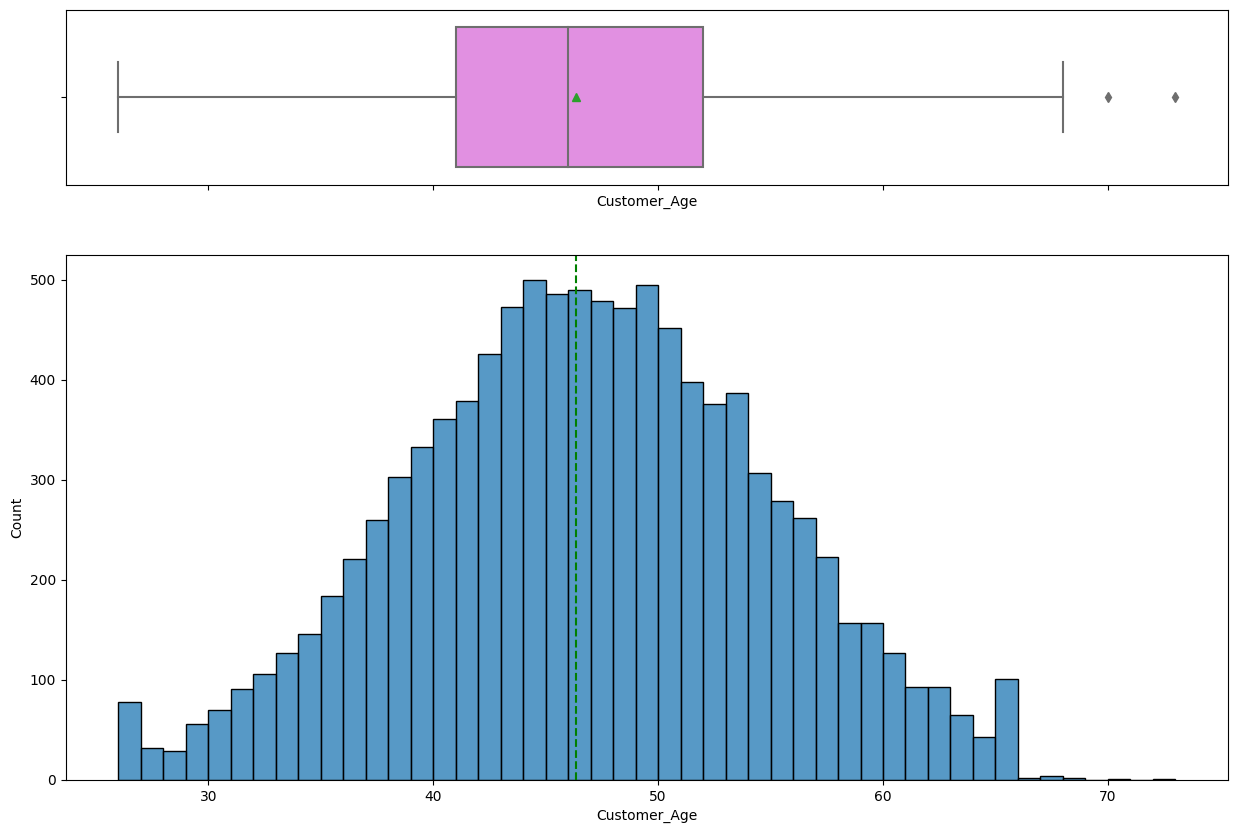

In [ ]:
histogram_boxplot(data['Customer_Age'])

Age distribution is a normal distribution with a mean of 46 years old with a couple of outliers but nothing extreme so I do not plan on treating the two outliers shown in the box plot

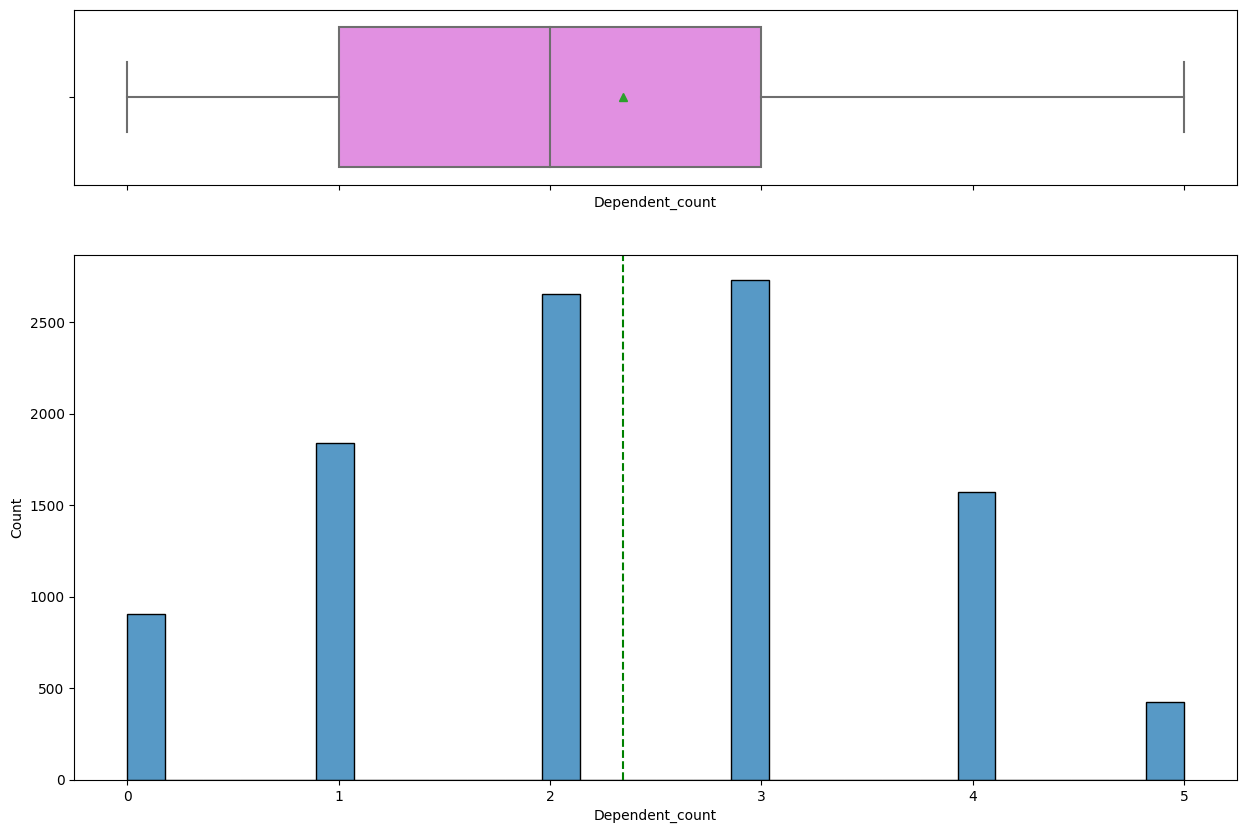

In [ ]:
histogram_boxplot(data['Dependent_count'])

Normal Distribution of dependant count with the majority of customers having 2 to 3 dependants  No outliers

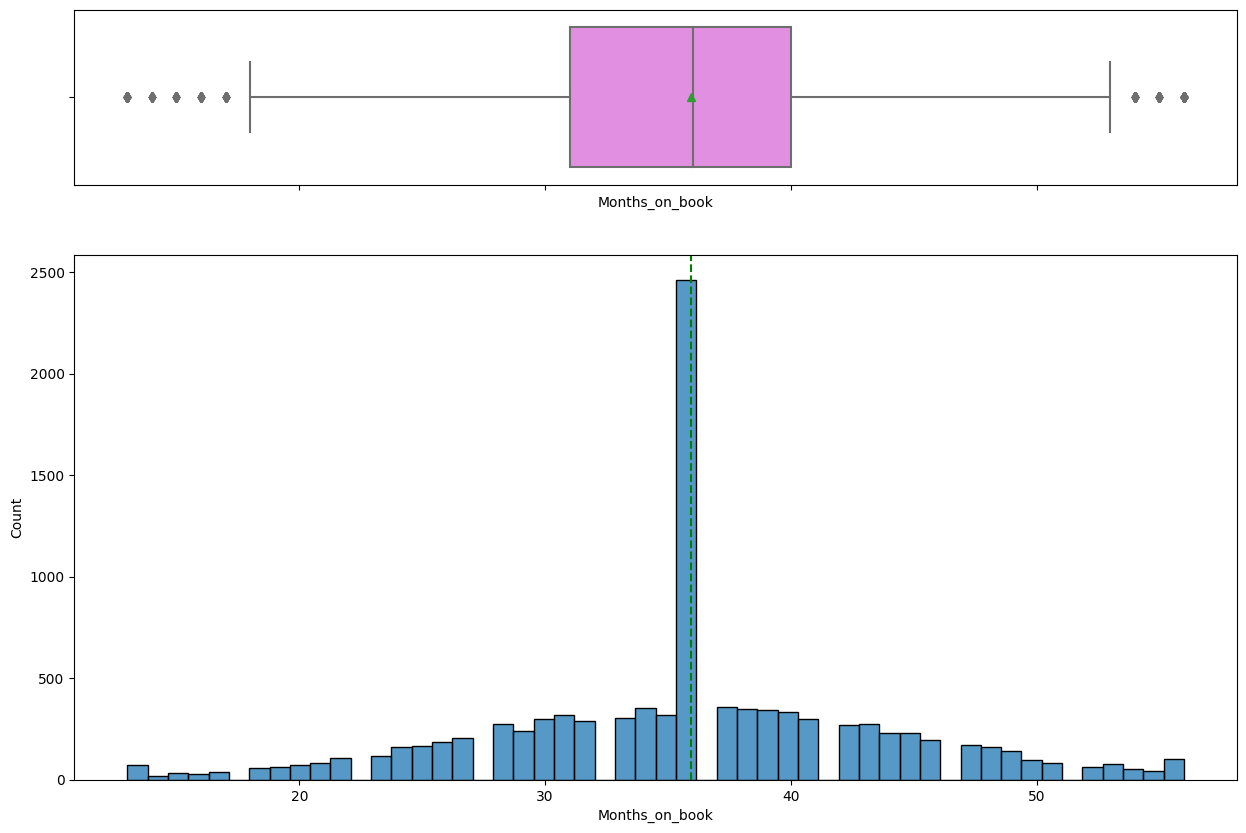

In [ ]:
histogram_boxplot(data['Months_on_book'])

Note that even though the distribution for customer tenure is normal   there is a huge spike in tenure at the 36 month period.  This is probably due to a business event like an aquistion.  To account for possible inflence by customers from that event I will engineer a new feature that catoegorizes that cohort separately from the other customers called acquired so the training can pick up possible signals.  There a small number of outliers but not extreme so I will not treat.

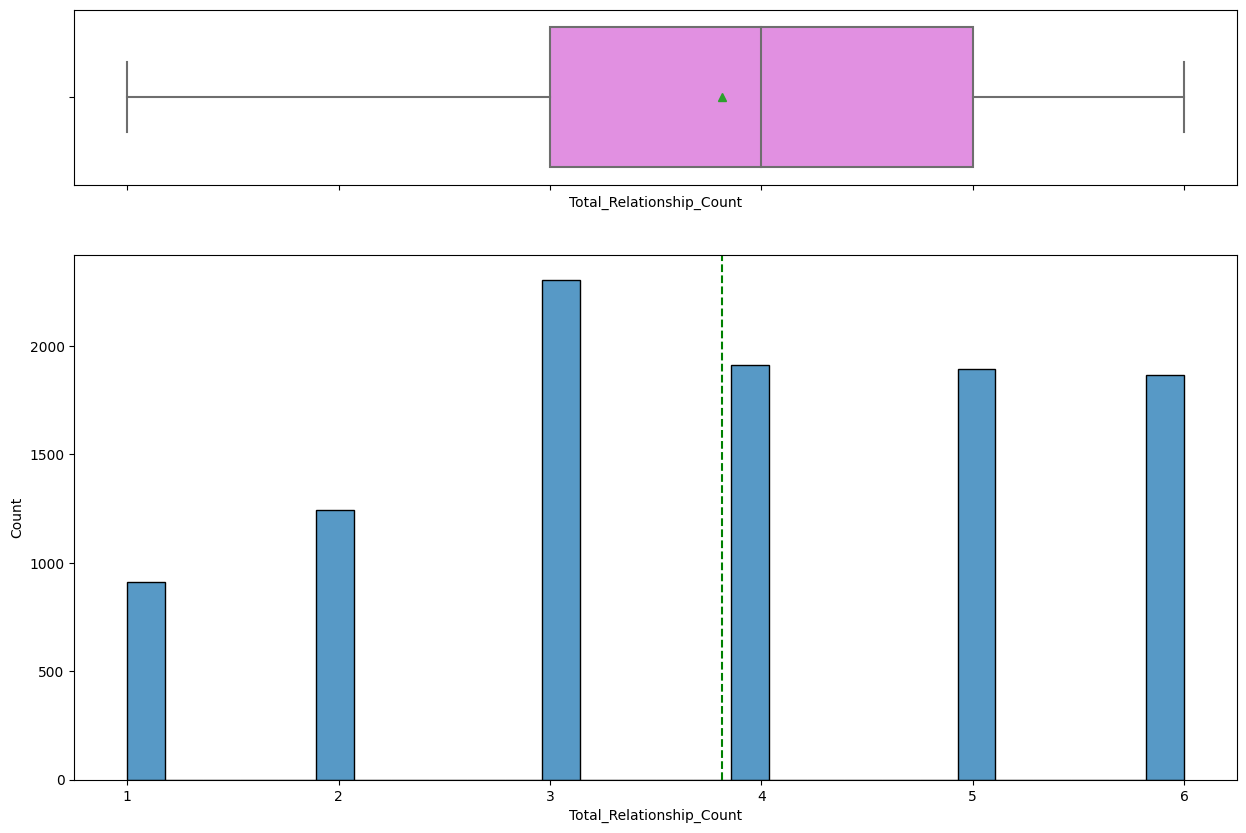

In [ ]:
histogram_boxplot(data['Total_Relationship_Count'])

This feature represents the number of products used by the customer

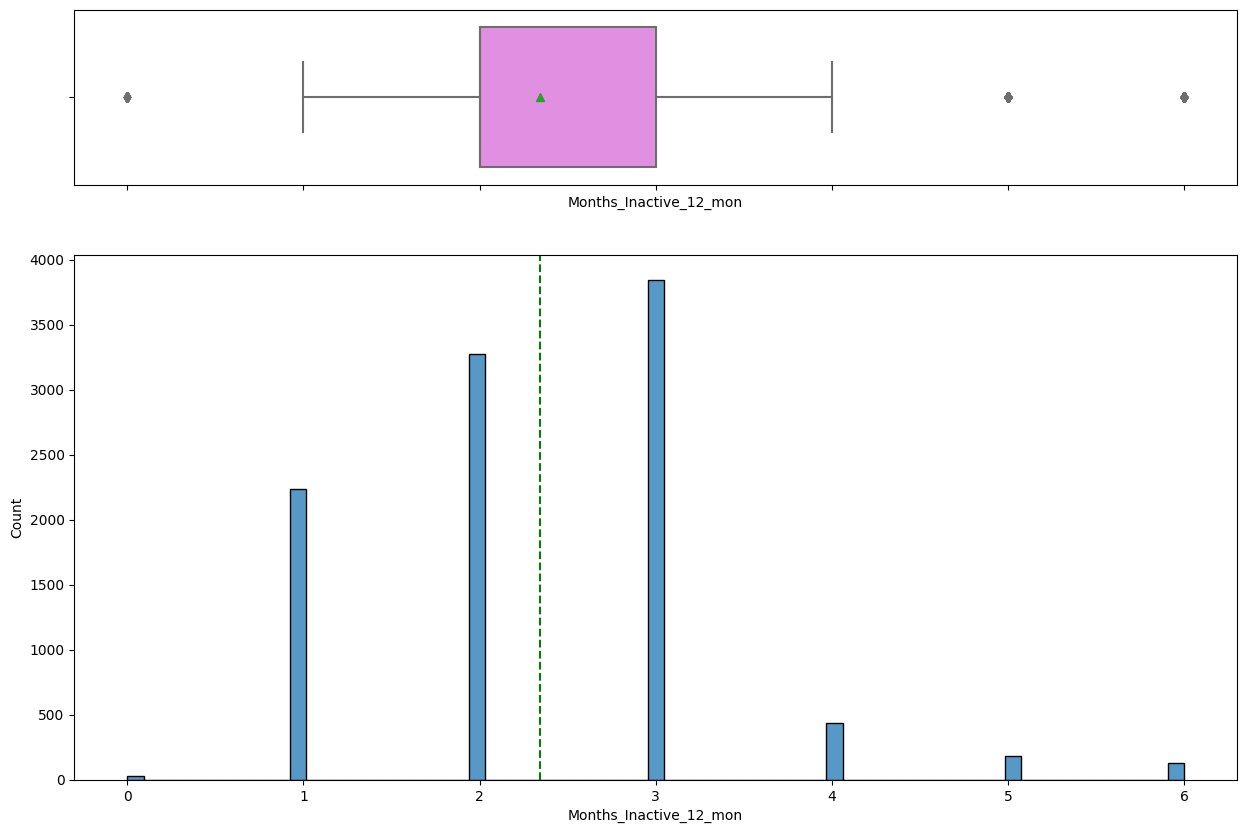

In [ ]:
histogram_boxplot(data['Months_Inactive_12_mon'])

Months without activity over a 12 month period. No extreme outliers.

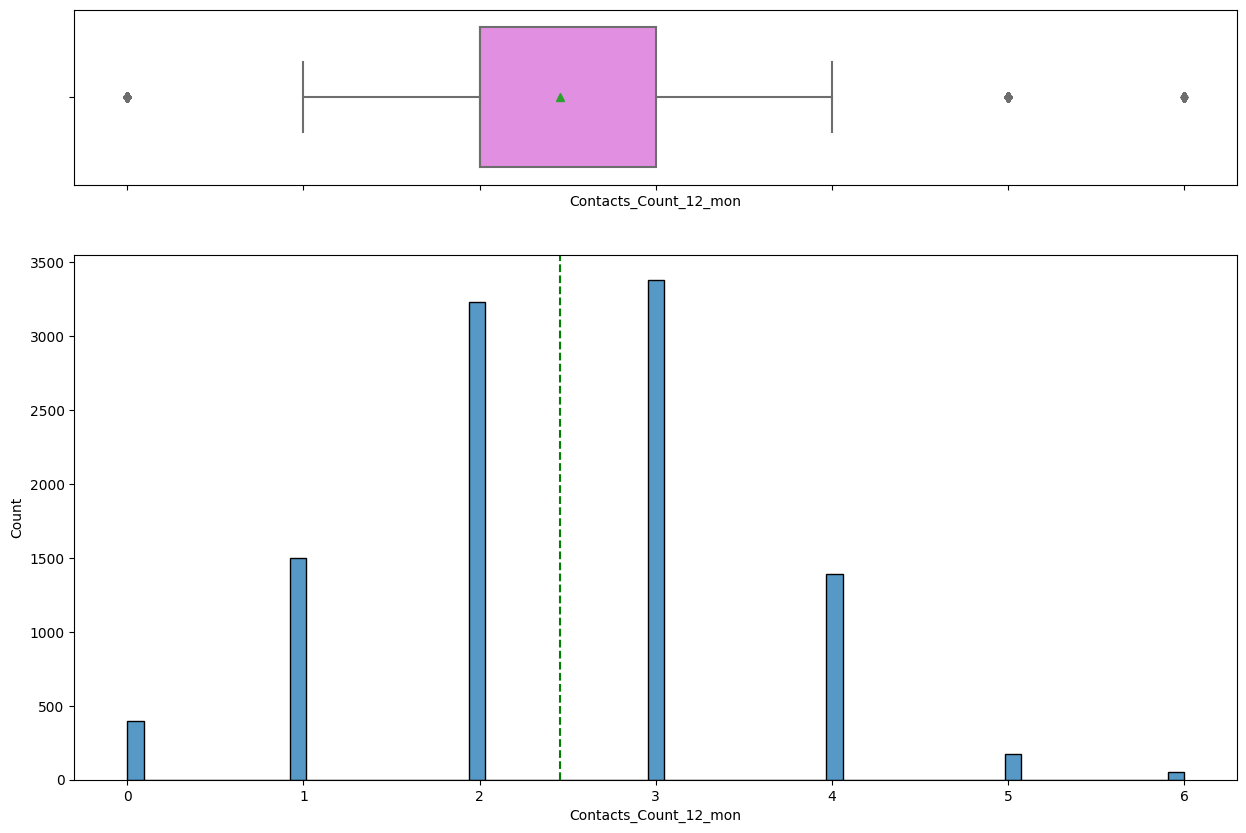

In [ ]:
histogram_boxplot(data['Contacts_Count_12_mon'])

Number of contacts with the bank over a 12 month period. No extreme outliers.

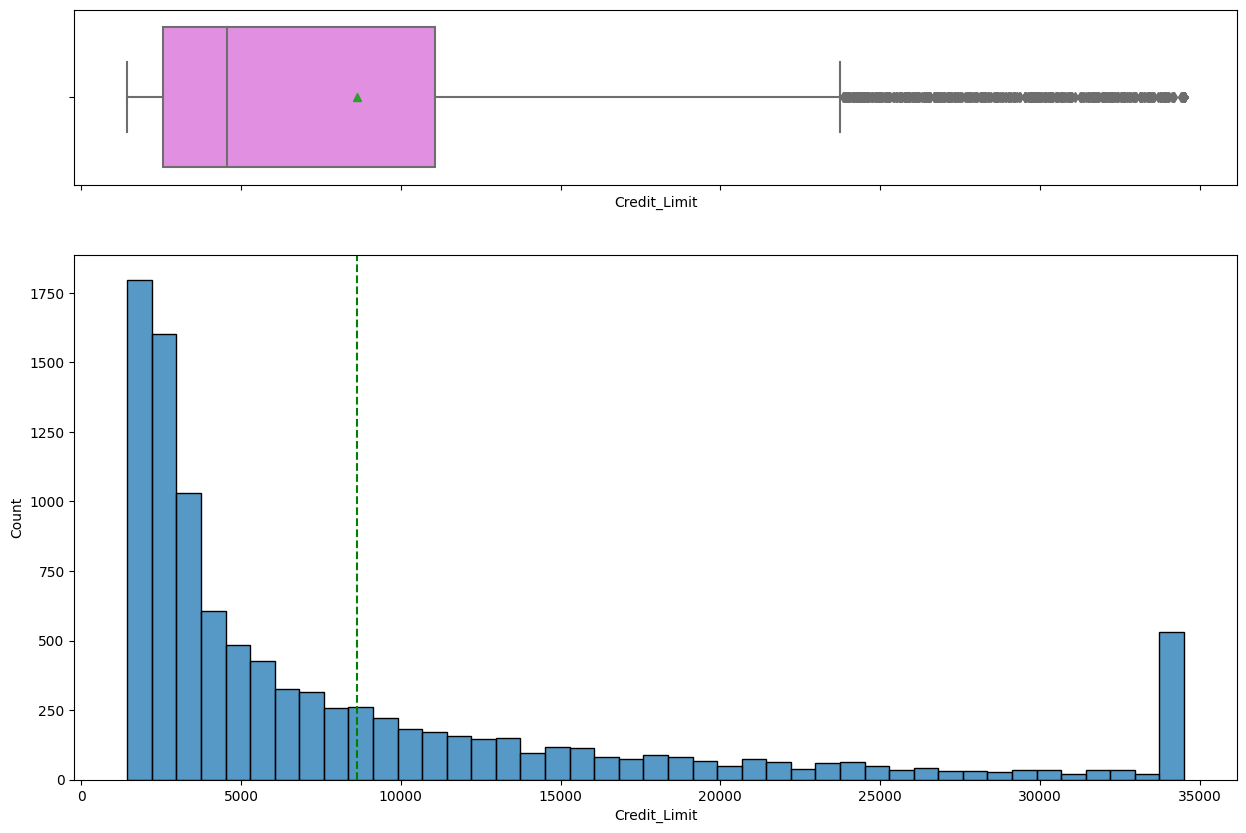

In [ ]:
histogram_boxplot(data['Credit_Limit'])

The credit limit for customers is skewed  but you can see that there are a good nmber of outliers with very high credit limits.  This will probably skew the training for this feature so I will run the model with this data in th training and then treat the outliers and see what difference it makes.  I will try one of two methods to reduce the infuence of these outliers,  either by capping or normalizing with a logarithmic function to reduce the influence of the outliers.

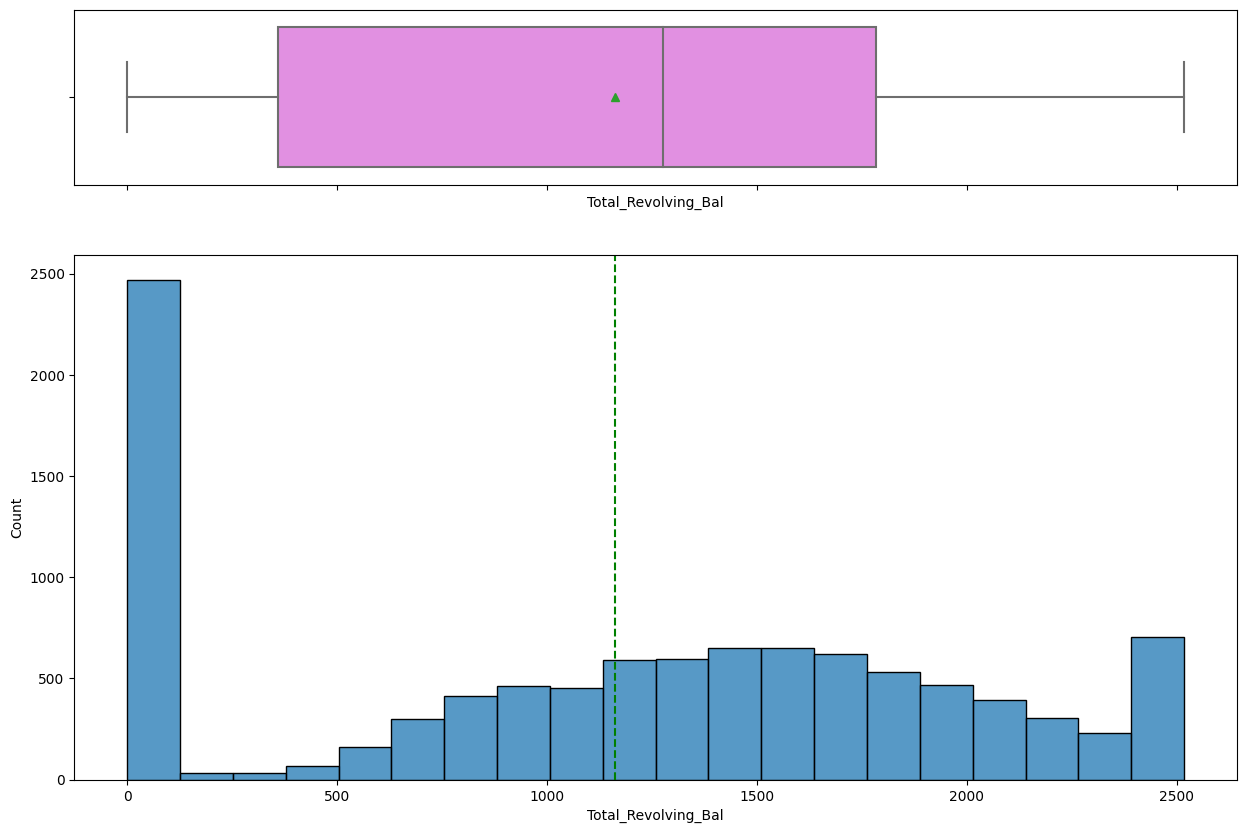

In [ ]:
histogram_boxplot(data['Total_Revolving_Bal'])

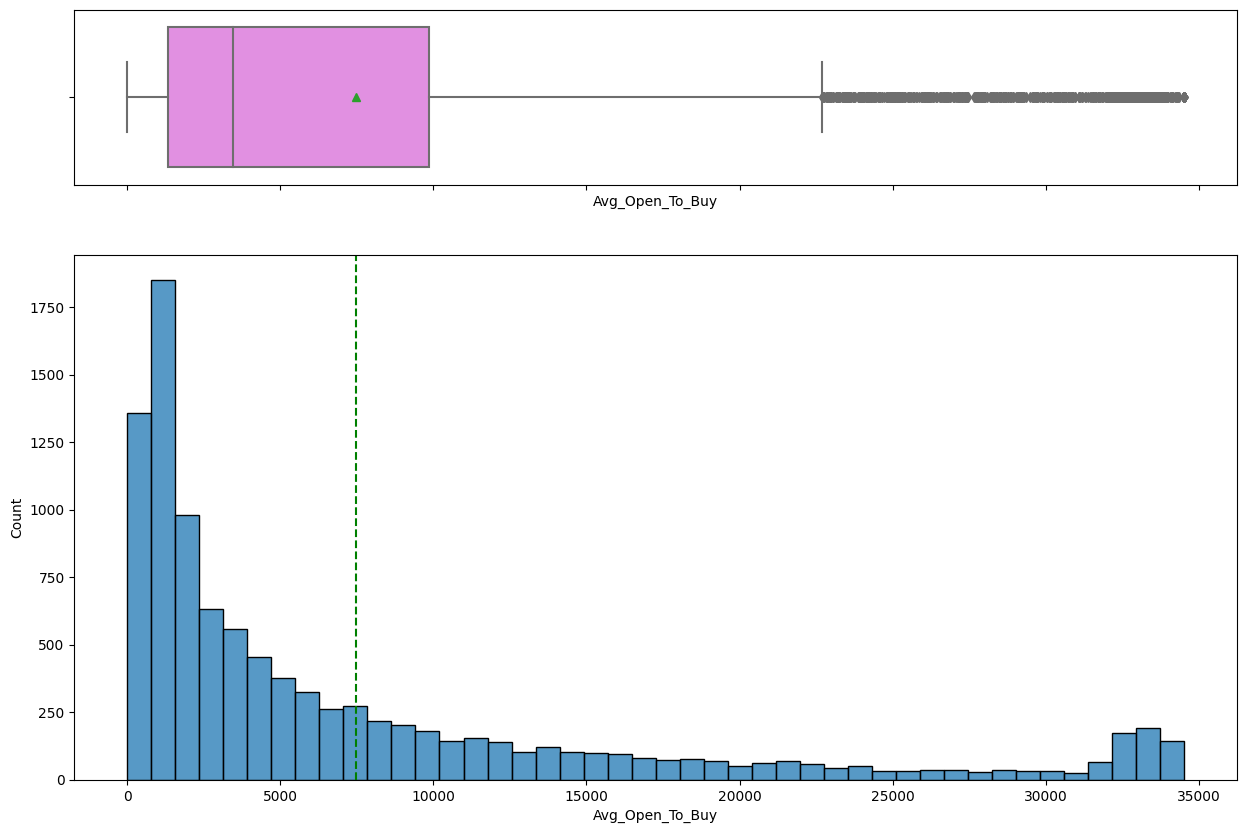

In [ ]:
histogram_boxplot(data['Avg_Open_To_Buy'])

Here again I have a right skewed pattern but with a good sized number of outliers on the right that coul dinfluence the training.  I will again either cap of normalize with a logarithmic scale.

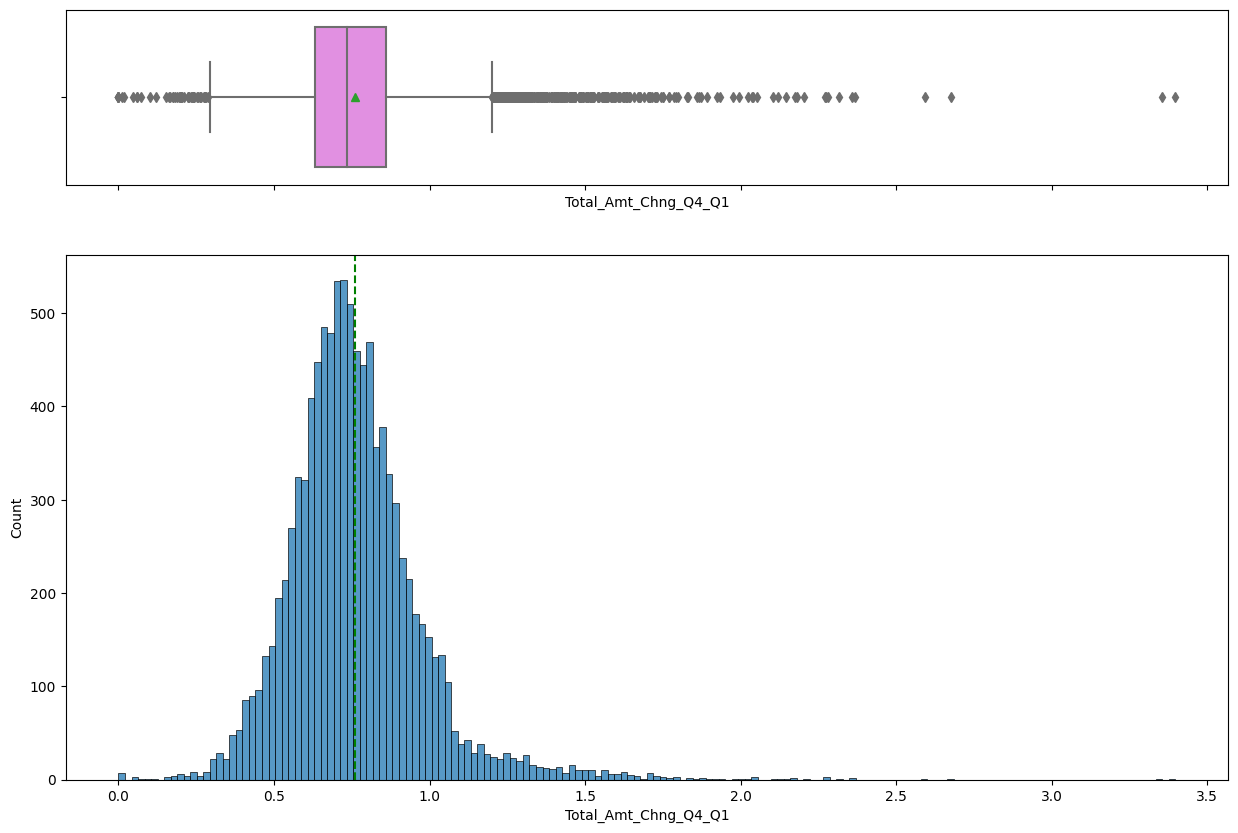

In [ ]:
histogram_boxplot(data['Total_Amt_Chng_Q4_Q1'])

NOrmalizeed distribution with a good number of outliers but nothing extreme.

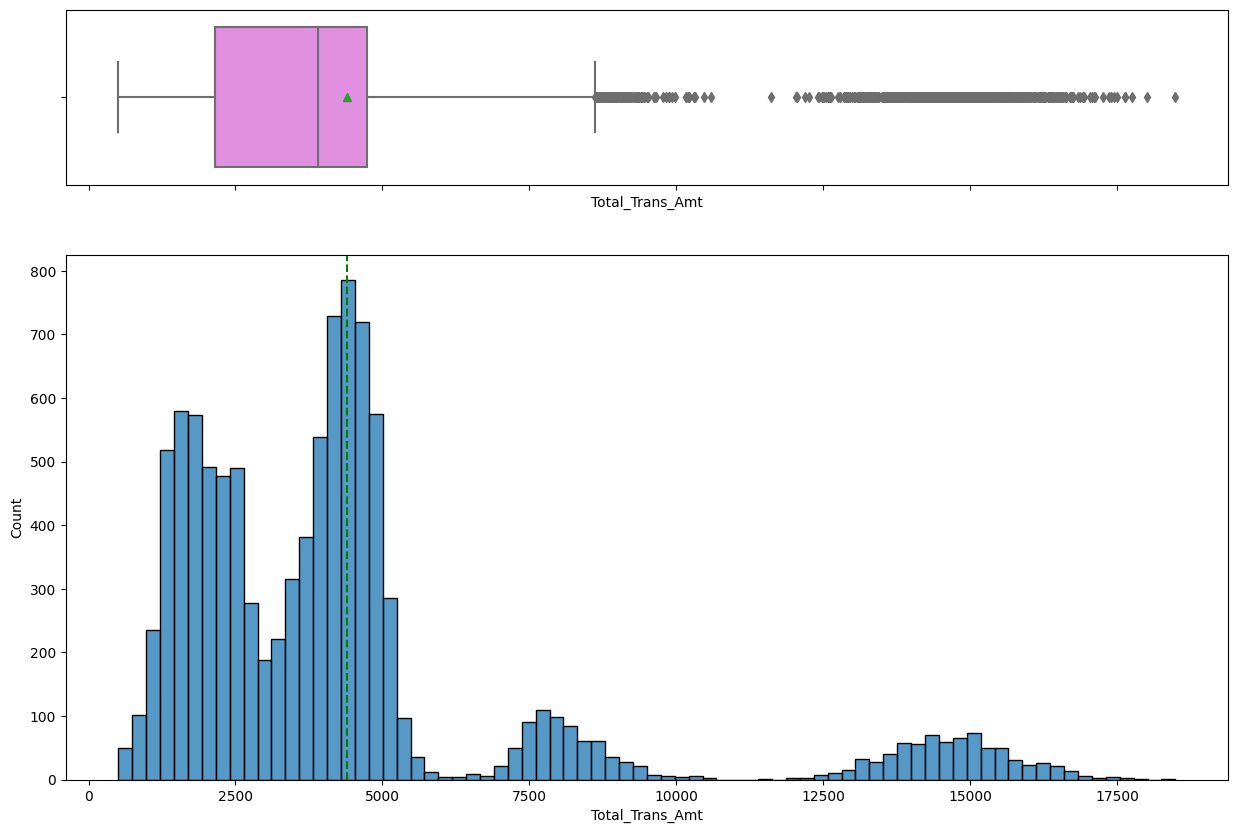

In [ ]:
histogram_boxplot(data['Total_Trans_Amt'])

Total Transaction Amount has a somewhat right skewed distribution but nothing extreme will handle with normalization.

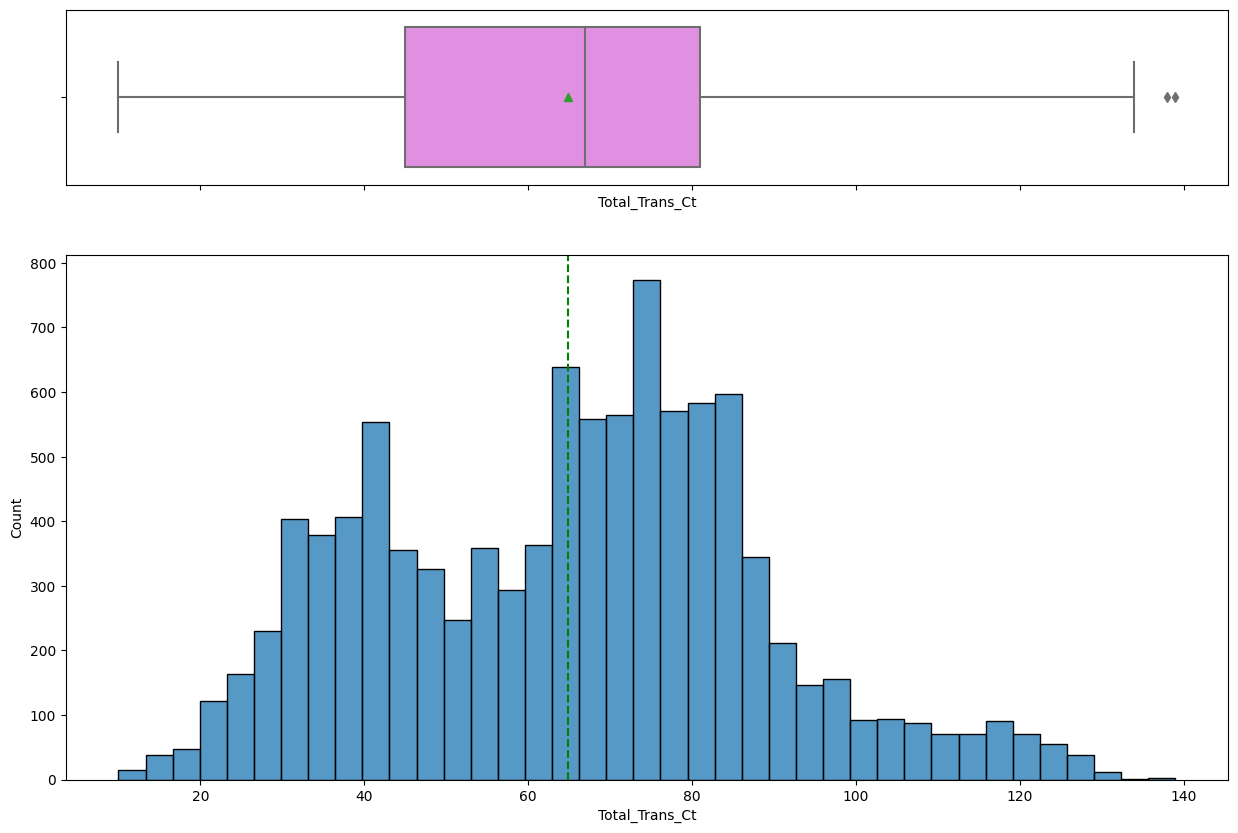

In [ ]:
histogram_boxplot(data['Total_Trans_Ct'])

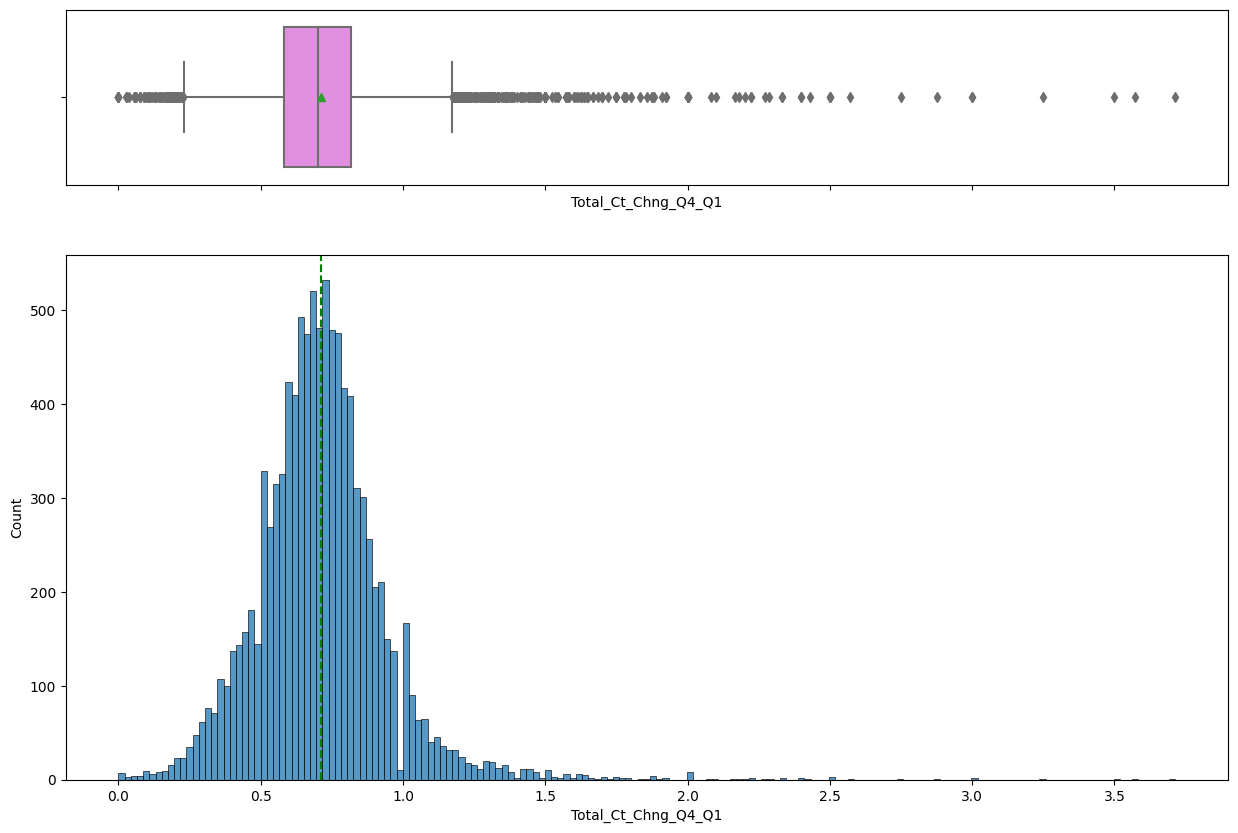

In [ ]:
histogram_boxplot(data['Total_Ct_Chng_Q4_Q1'])

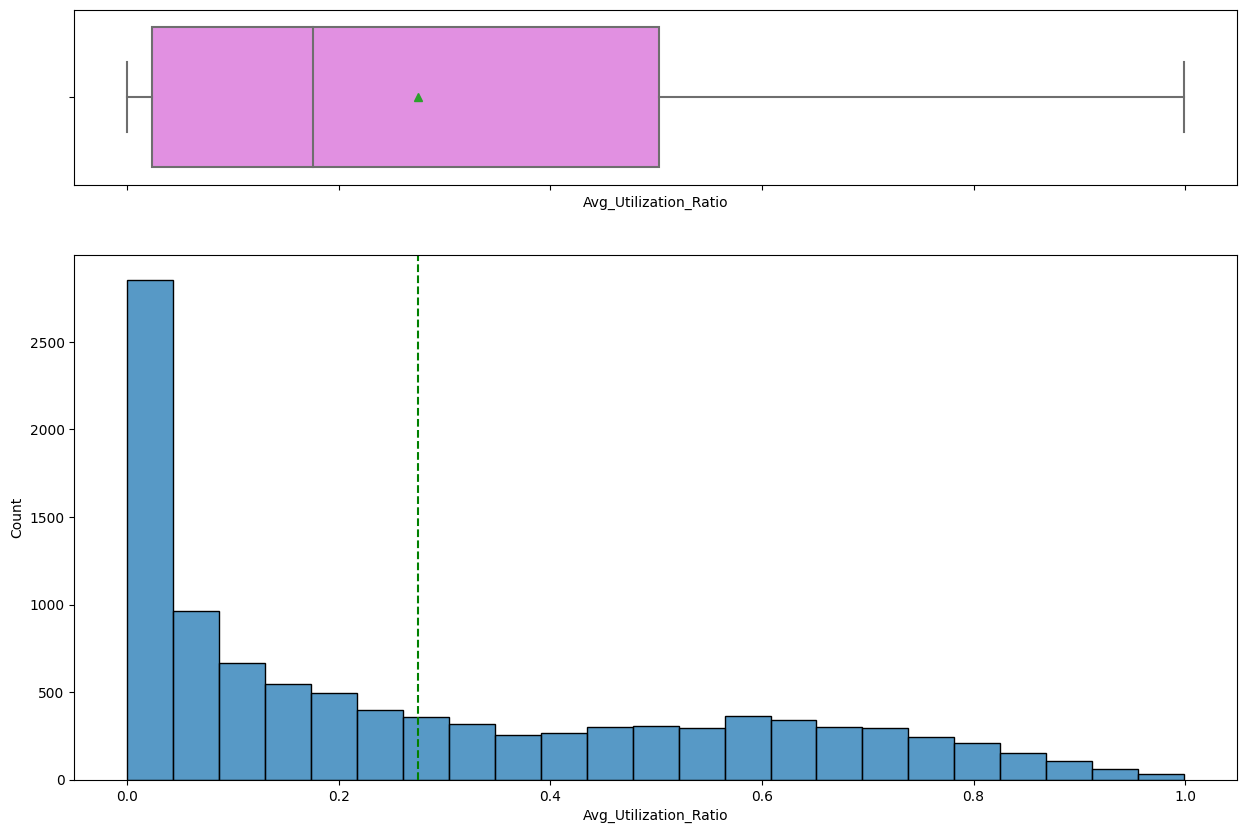

In [ ]:
histogram_boxplot(data['Avg_Utilization_Ratio'])

In [ ]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=data)

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage

    plt.show() # show the plot

#Categorical Distibution
The Next five charts show distribution of some key categories amd are self-explanatory.  Note again when you see Attrition the Churned or Attrited Customers are much larger than what a company would want.

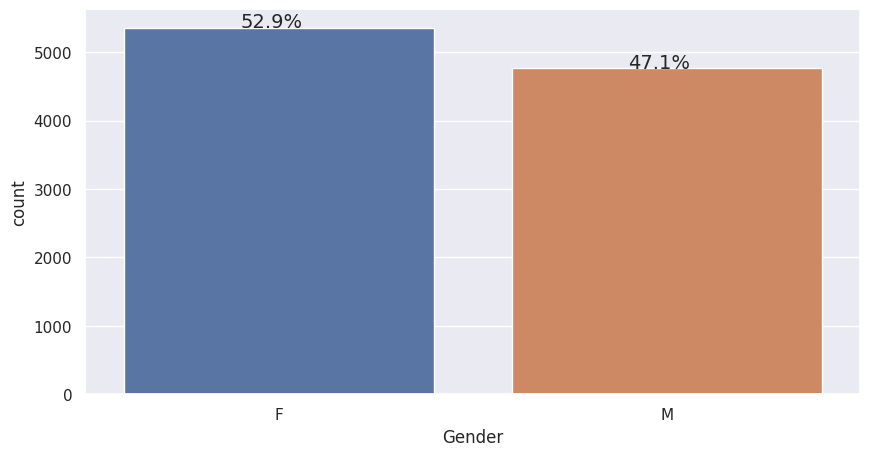

In [ ]:
perc_on_bar(data['Gender'])

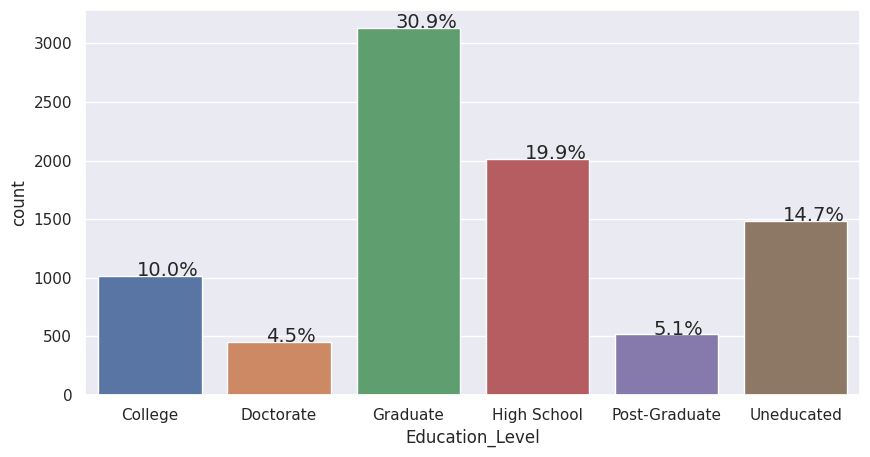

In [ ]:
perc_on_bar(data['Education_Level'])

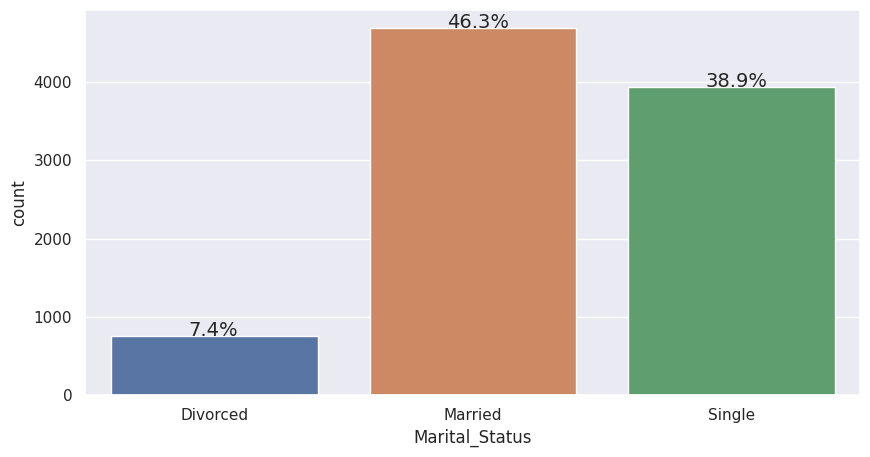

In [ ]:
perc_on_bar(data['Marital_Status'])

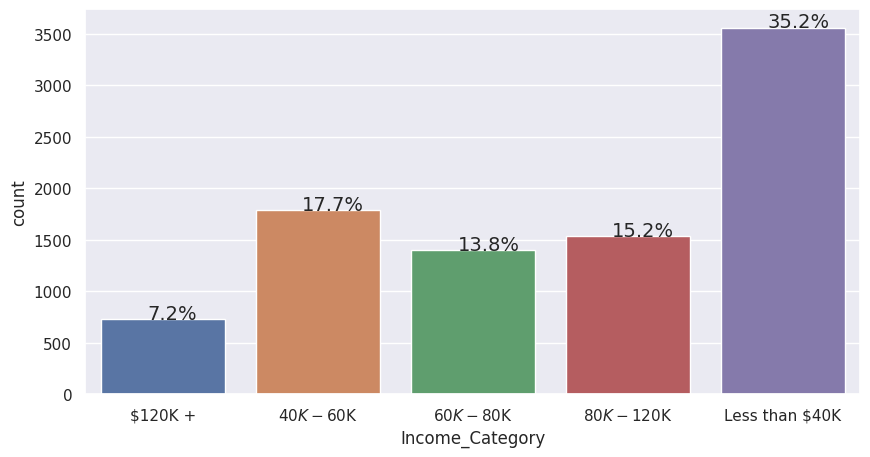

In [ ]:
perc_on_bar(data['Income_Category'])

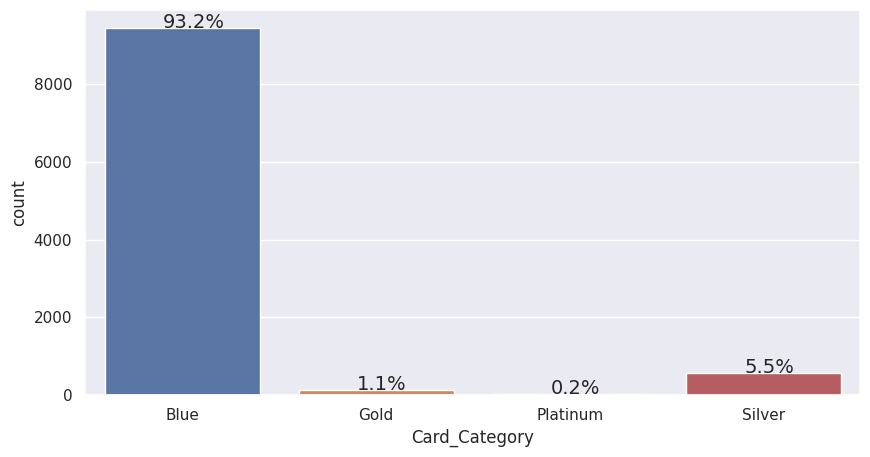

In [ ]:
perc_on_bar(data['Card_Category'])

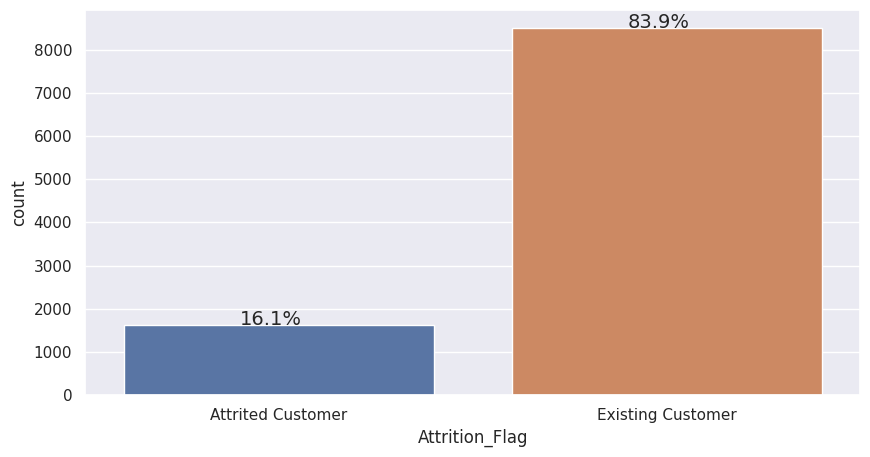

In [ ]:
perc_on_bar(data['Attrition_Flag'])

#Attrition by Category
These are very important charts  They point out if attrition is higher for a given category giving us a clue as to where we may want to create stategies to reduce churn

Proportianately, we do not see great discrepancies within categories but we can see in share volume where higher churn volume exists. so targeted spends on programs towards college grade, or married couples or lower income groups might get a better bang for the buck in lowering churn.

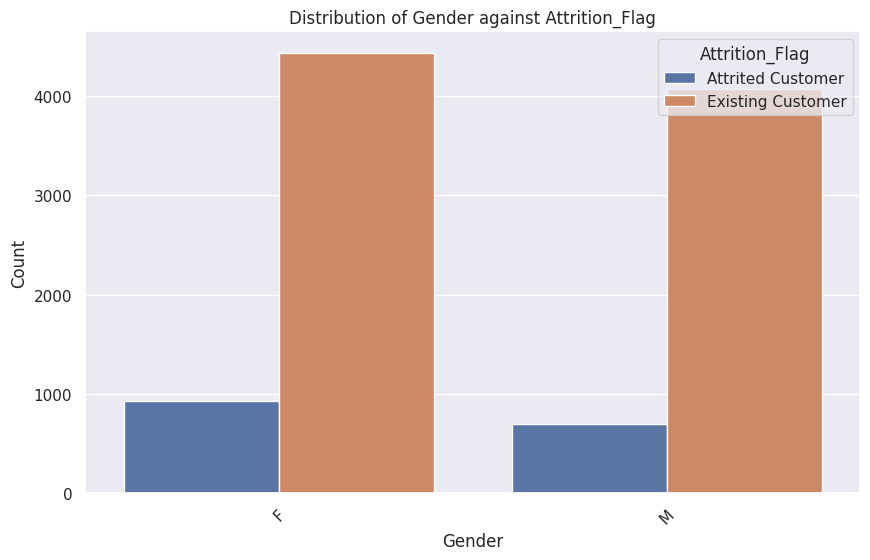

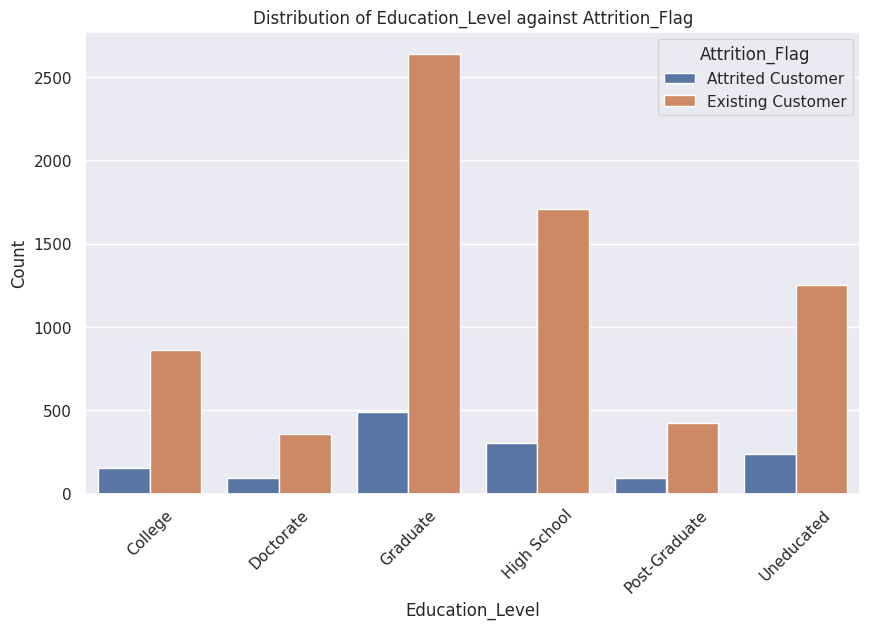

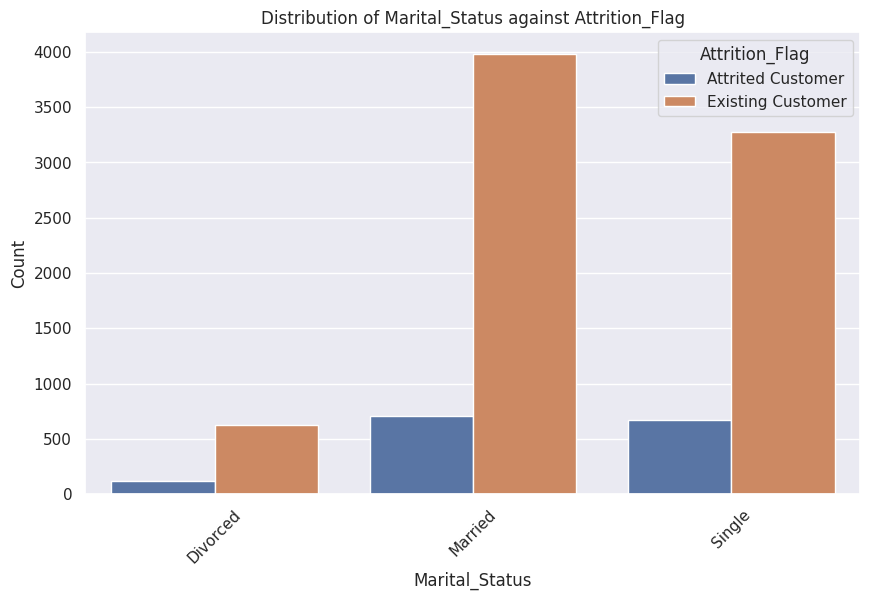

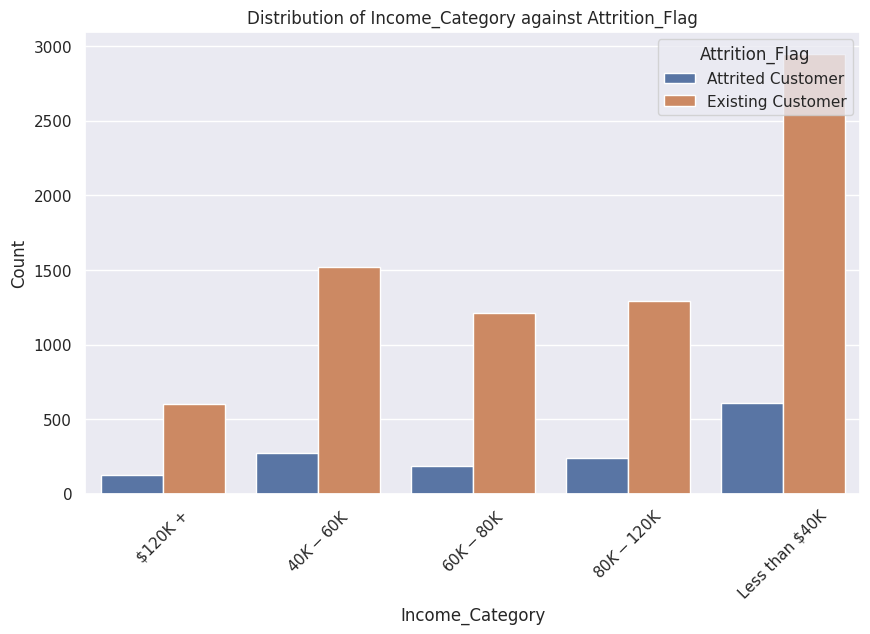

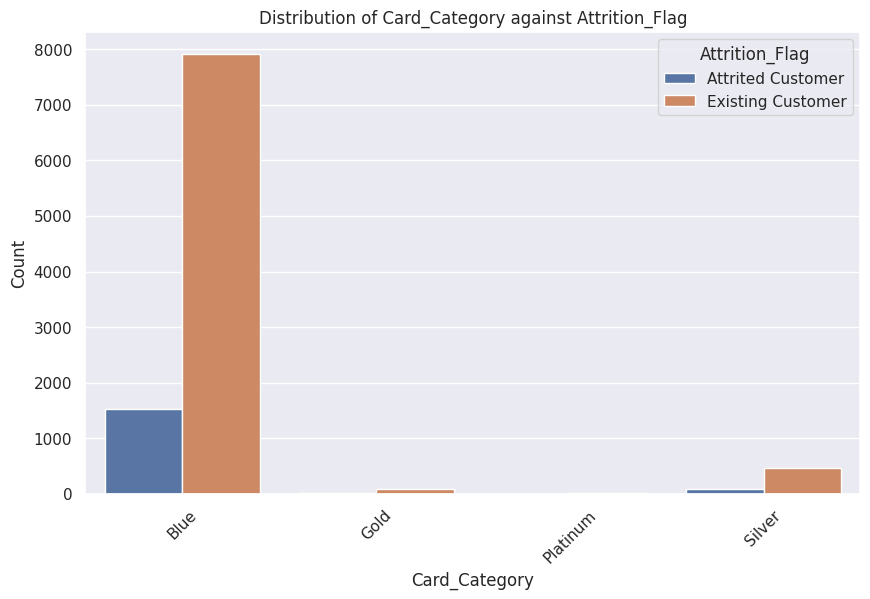

In [ ]:
# Define the list of categorical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Plot the distribution of each categorical feature against the target variable
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Attrition_Flag', data=data)
    plt.title(f'Distribution of {feature} against Attrition_Flag')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Attrition_Flag', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

#Attrition by Category
These are very important charts  They point out if attrition is higher for a given category giving us a clue as to where we may want to create stategies to reduce churn

Attrition_Flag

## Bivariate Analysis

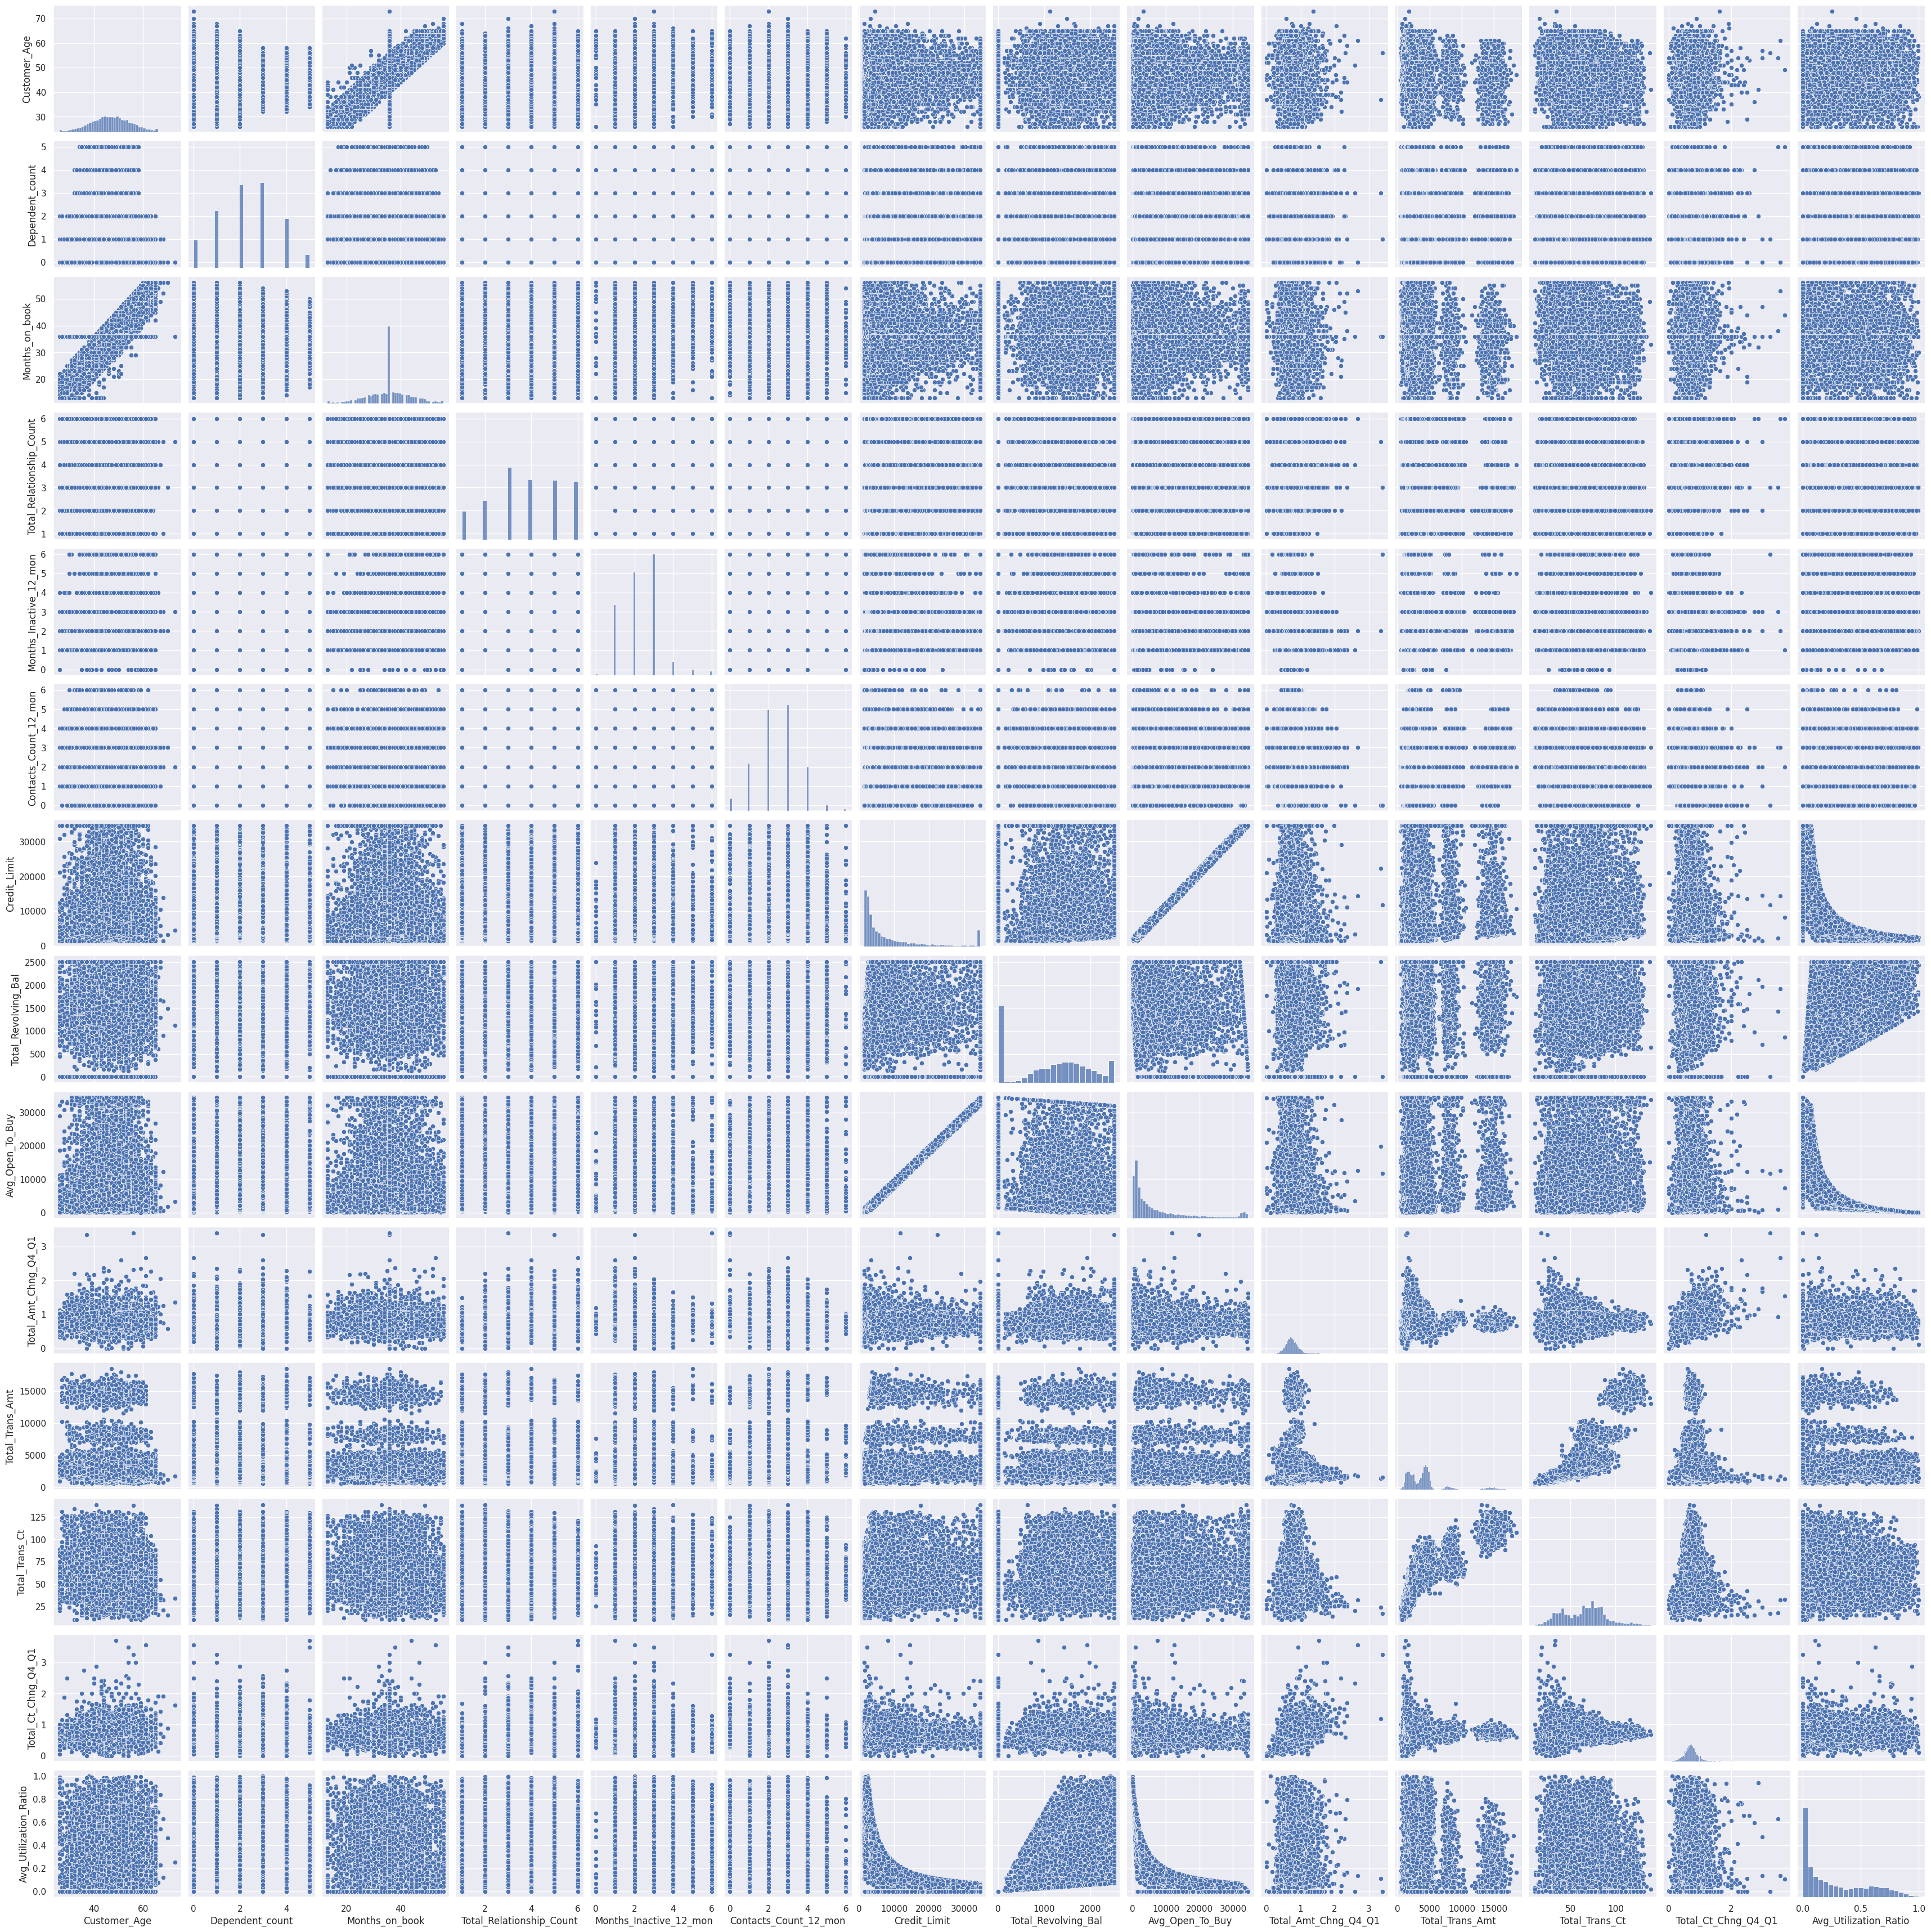

In [ ]:
sns.pairplot(data=data[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']])

There are very strong correlations between Age and Months on Book,

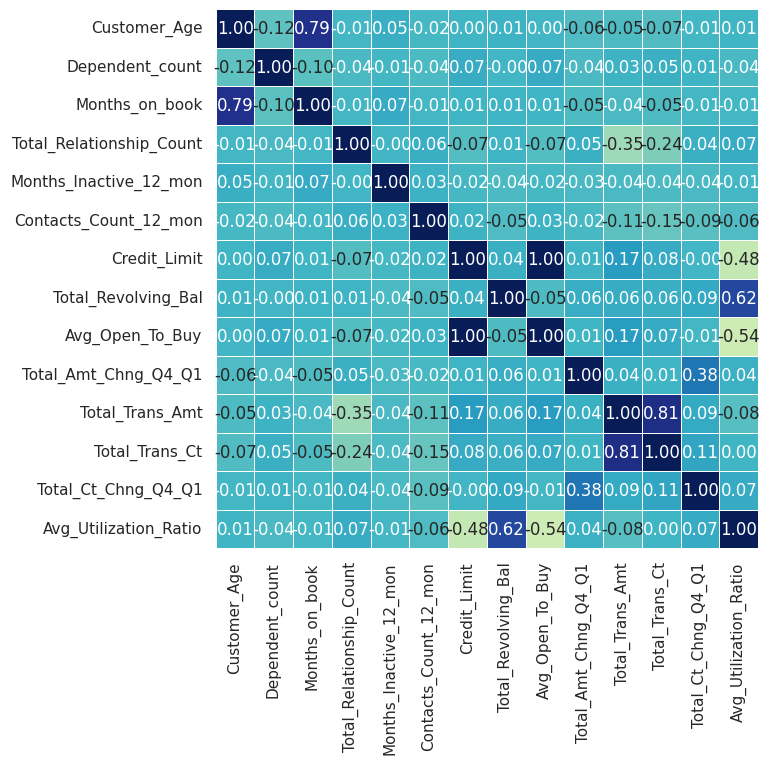

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')
plt.show()

# Corellation Analysis
There are very strong correlations between Age and Months on Book, Avg_Open_To_Buy and Credit Limit, Avg_Utilization_Ratio and Total_Revolving Balance
Since I believe there is a a relationship between Avg_Open_To_Buy and Credit Limit, Avg_Utilization_Ratio and Total_Revolving Balance I will drop one of each
pair in data prep to reduce the effects of multicollinearity on my models

In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Attrition_Flag'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,data['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#Stacked Normalized Plots vs Attrition
These plots just confirm what i saw earlier that thee is no real stand out in terms of a category having more proportional churn. These charts take out the volume so point that out more clearly.

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


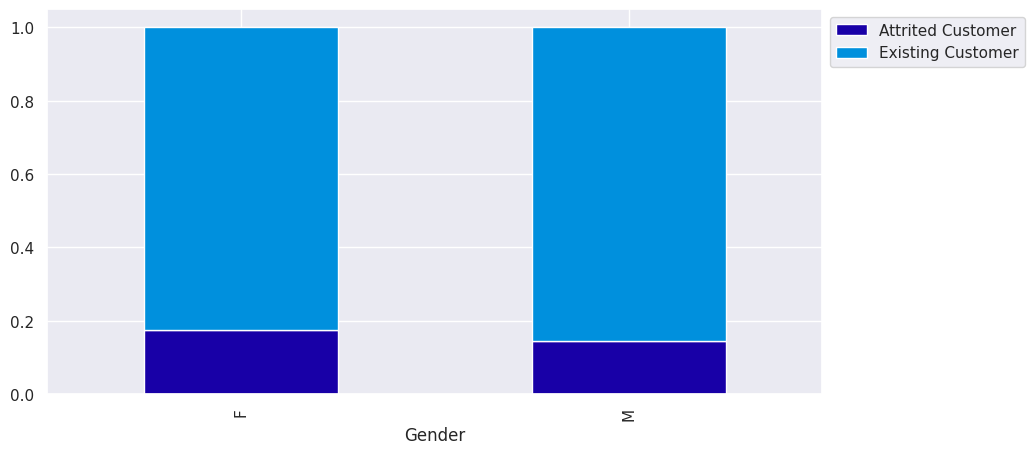

In [ ]:
stacked_plot(data.Gender)

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
College                        154                859  1013
Doctorate                       95                356   451
Graduate                       487               2641  3128
High School                    306               1707  2013
Post-Graduate                   92                424   516
Uneducated                     237               1250  1487
All                           1371               7237  8608
------------------------------------------------------------------------------------------------------------------------


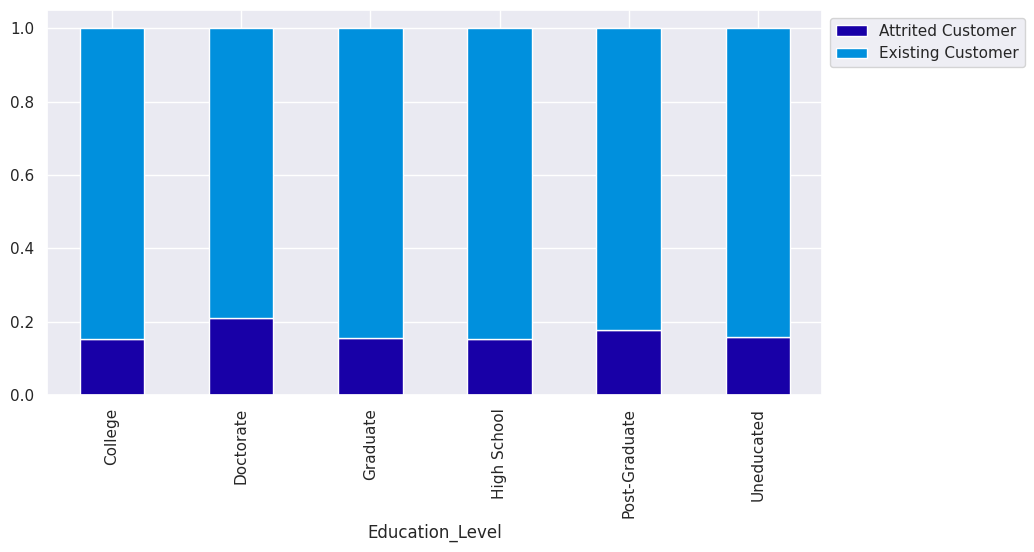

In [ ]:
stacked_plot(data.Education_Level)

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
Divorced                      121                627   748
Married                       709               3978  4687
Single                        668               3275  3943
All                          1498               7880  9378
------------------------------------------------------------------------------------------------------------------------


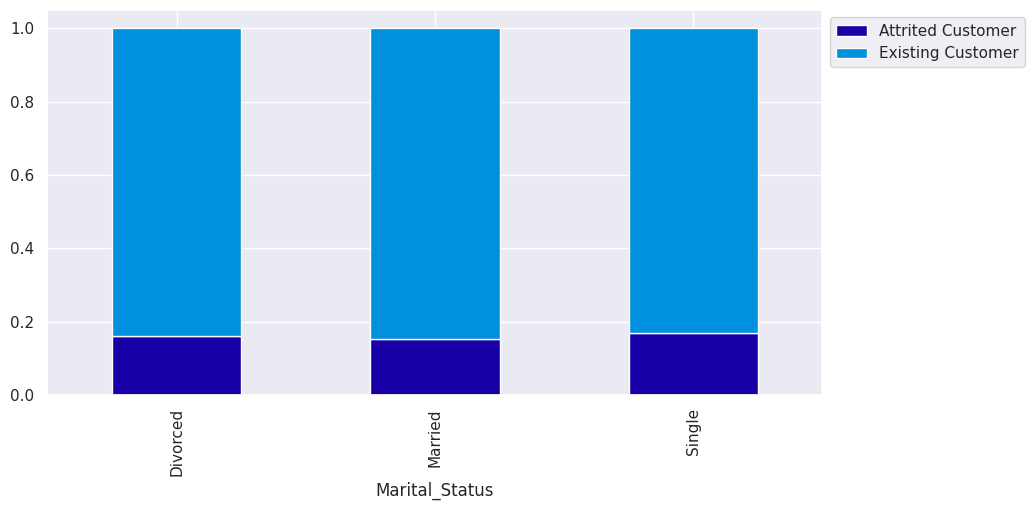

In [ ]:
stacked_plot(data.Marital_Status)

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
$120K +                        126                601   727
$40K - $60K                    271               1519  1790
$60K - $80K                    189               1213  1402
$80K - $120K                   242               1293  1535
Less than $40K                 612               2949  3561
All                           1440               7575  9015
------------------------------------------------------------------------------------------------------------------------


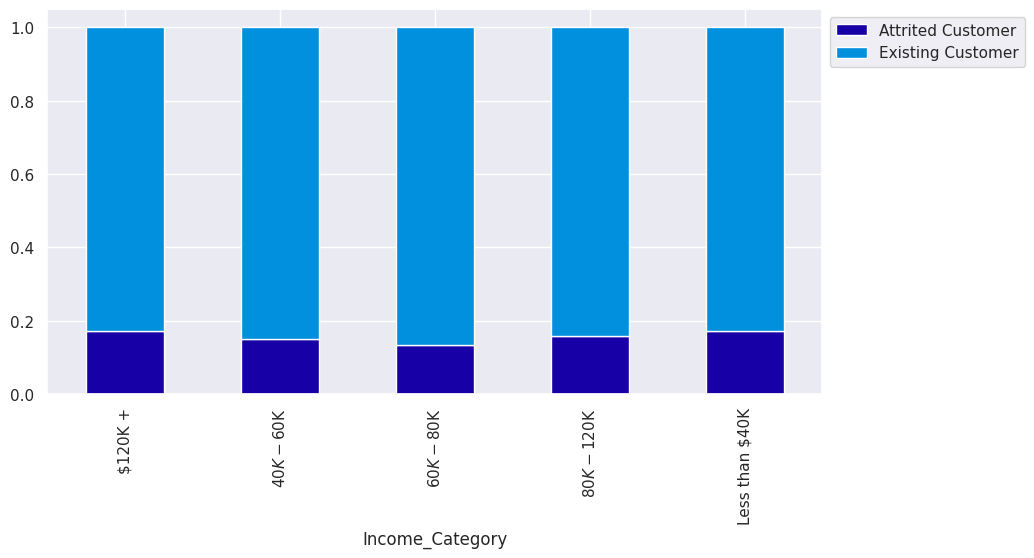

In [ ]:
stacked_plot(data.Income_Category)

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


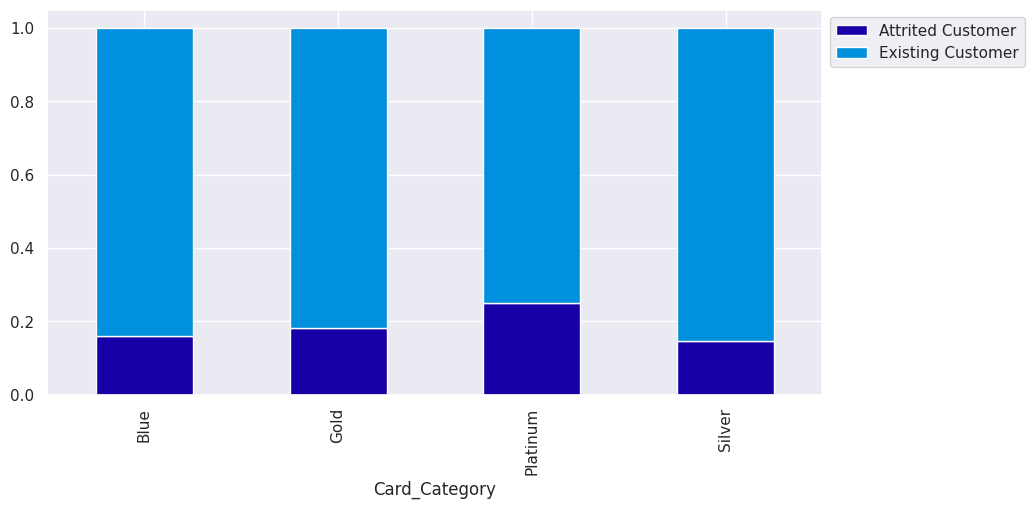

In [ ]:
stacked_plot(data.Card_Category)

# Numerical Distribution vs Attrition
This section runs box plots on numerical features for both the target classes to visualize if the range is different for each class.  It can again be a great clue to targeting churn reduction sttategies.  Comments are in test below the charts.

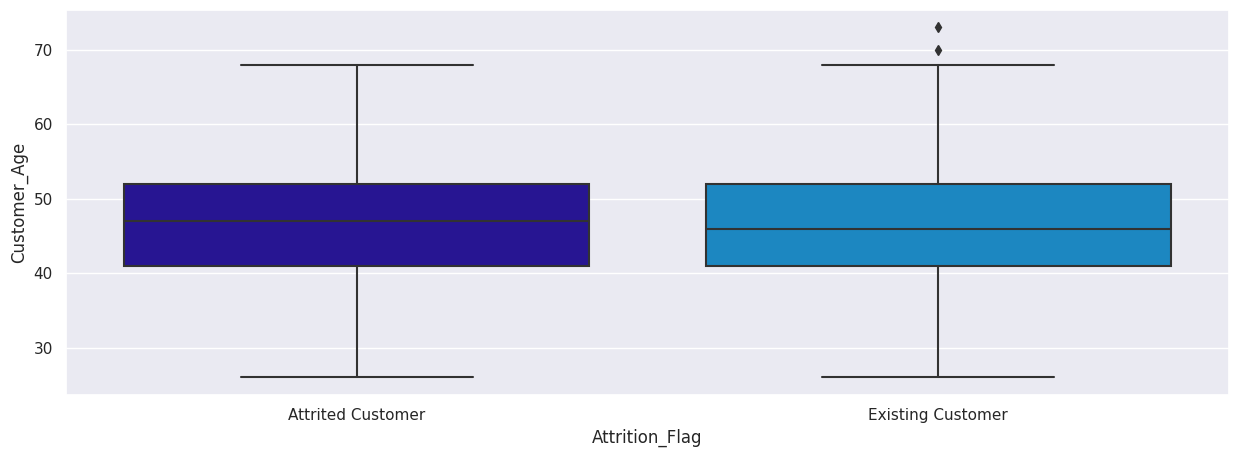

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Customer_Age', x='Attrition_Flag',data=data)
plt.show()

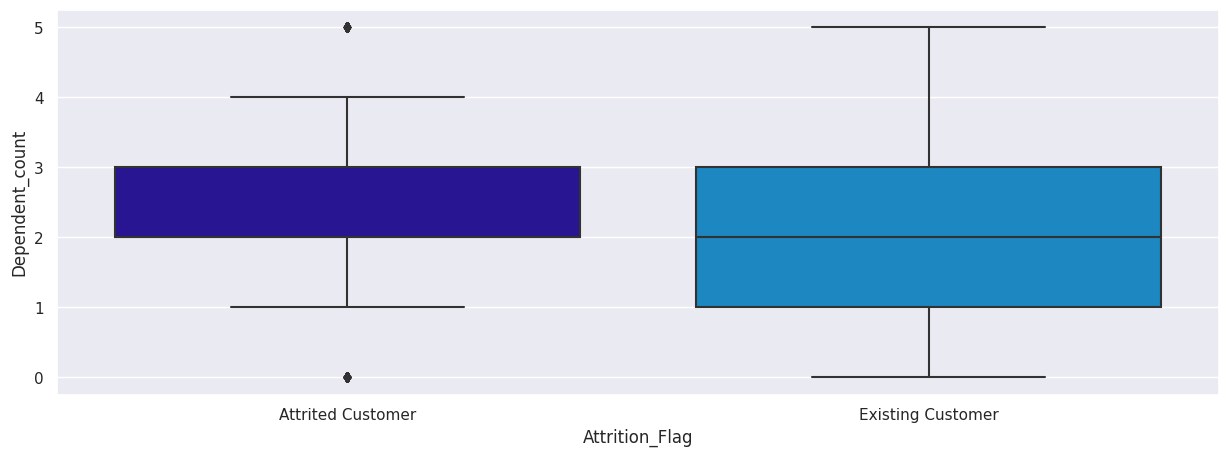

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Dependent_count', x='Attrition_Flag',data=data)
plt.show()

We see that the churned customers tend to have more dependants.

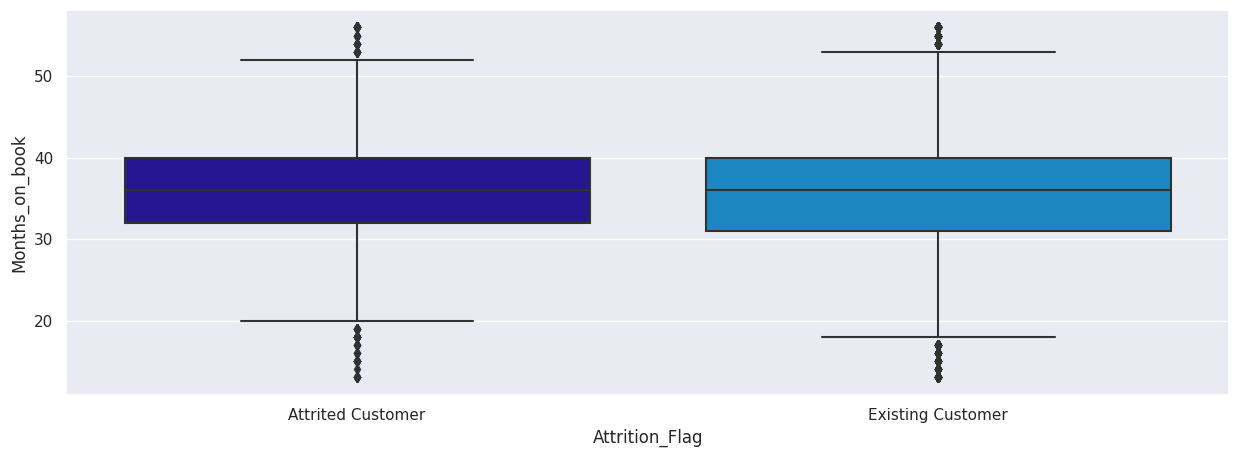

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Months_on_book', x='Attrition_Flag',data=data)
plt.show()

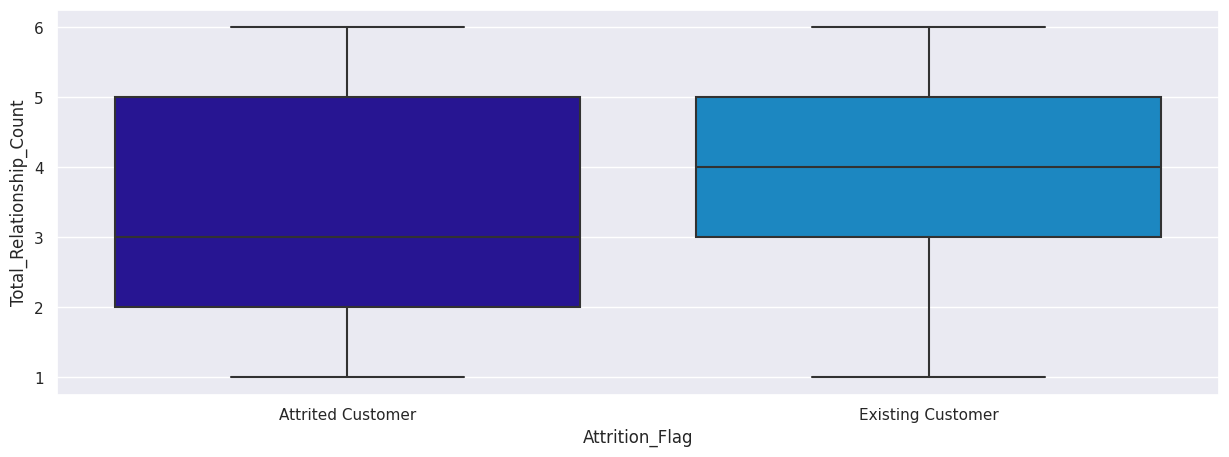

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Relationship_Count', x='Attrition_Flag',data=data)
plt.show()

Here we see the churned class tends to have use a lower number of products indicating that selling more products might lower churn.

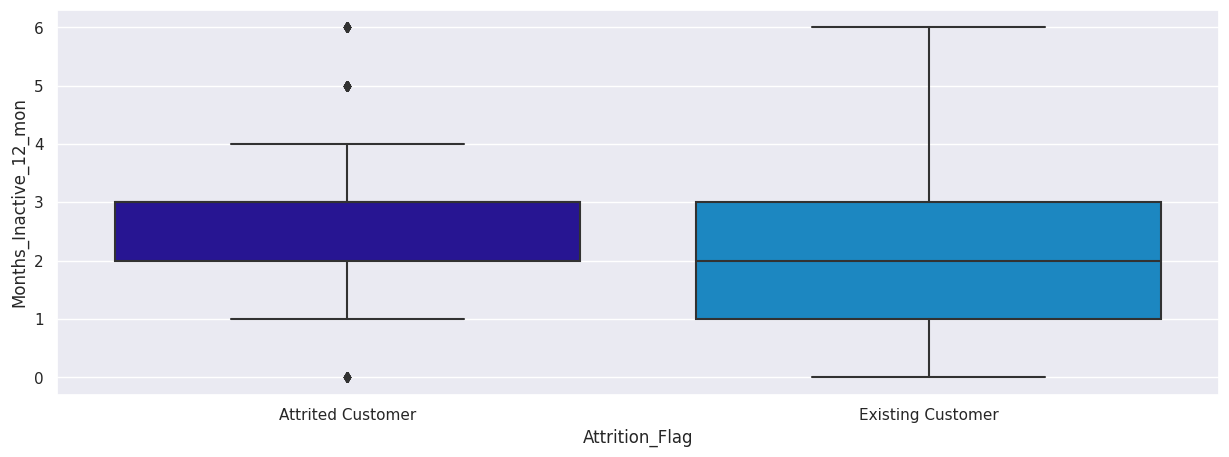

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Months_Inactive_12_mon', x='Attrition_Flag',data=data)
plt.show()

Higher months inactive seems to have more churn.

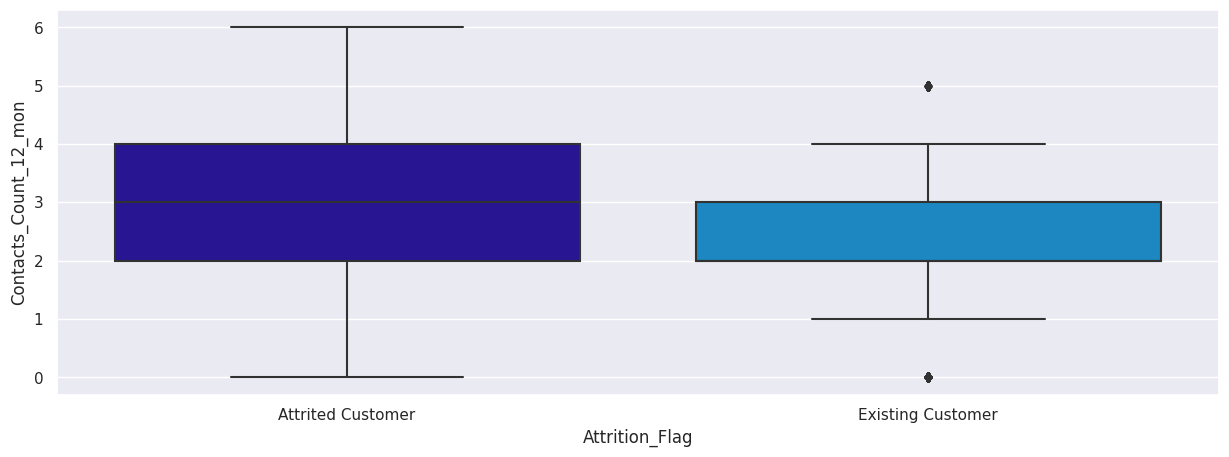

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Contacts_Count_12_mon', x='Attrition_Flag',data=data)
plt.show()

Higher number of contacts with the bank seems to have more churn.


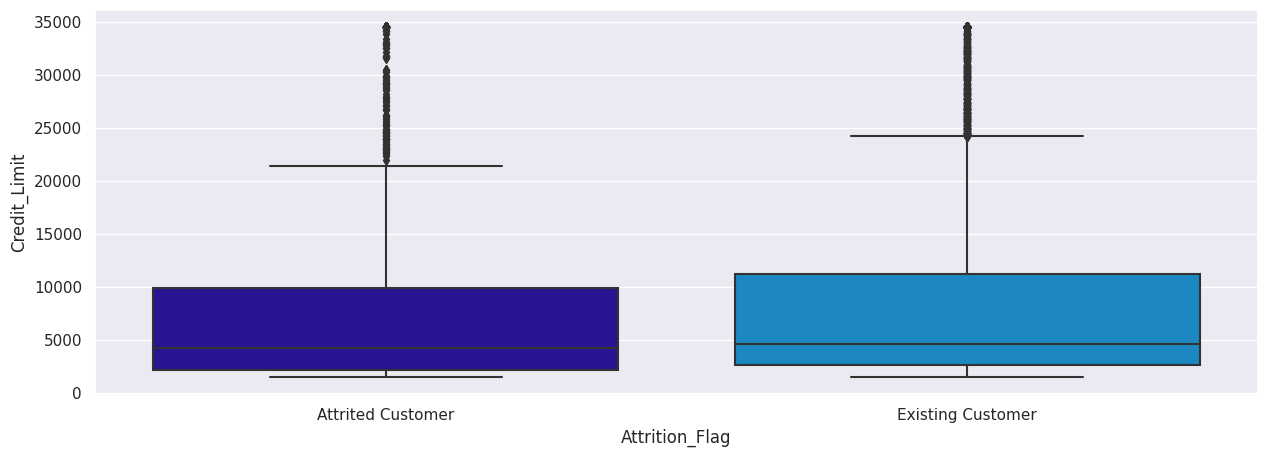

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Credit_Limit', x='Attrition_Flag',data=data)
plt.show()

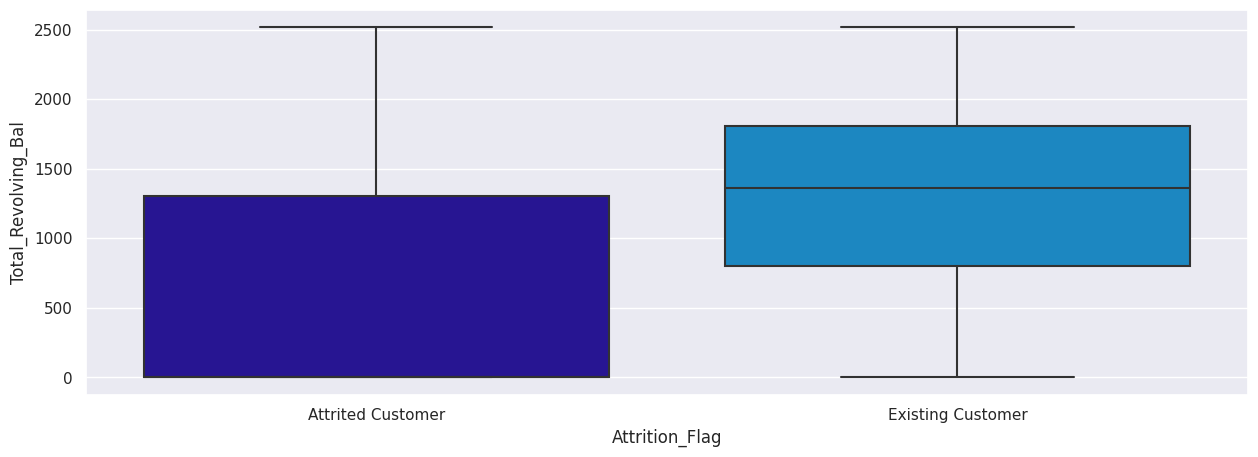

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Revolving_Bal', x='Attrition_Flag',data=data)
plt.show()

Higher revolving balance has less churn

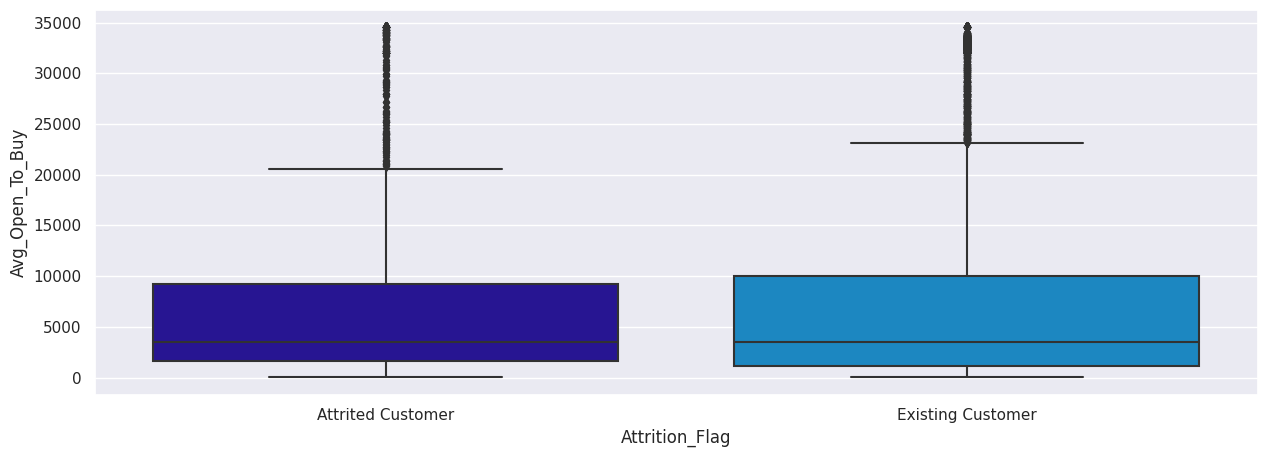

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Avg_Open_To_Buy', x='Attrition_Flag',data=data)
plt.show()

The next few features are associated with different volume activity and churned customers have lower activity which could just be associated with the fact that at some time they churned even before they closed their account

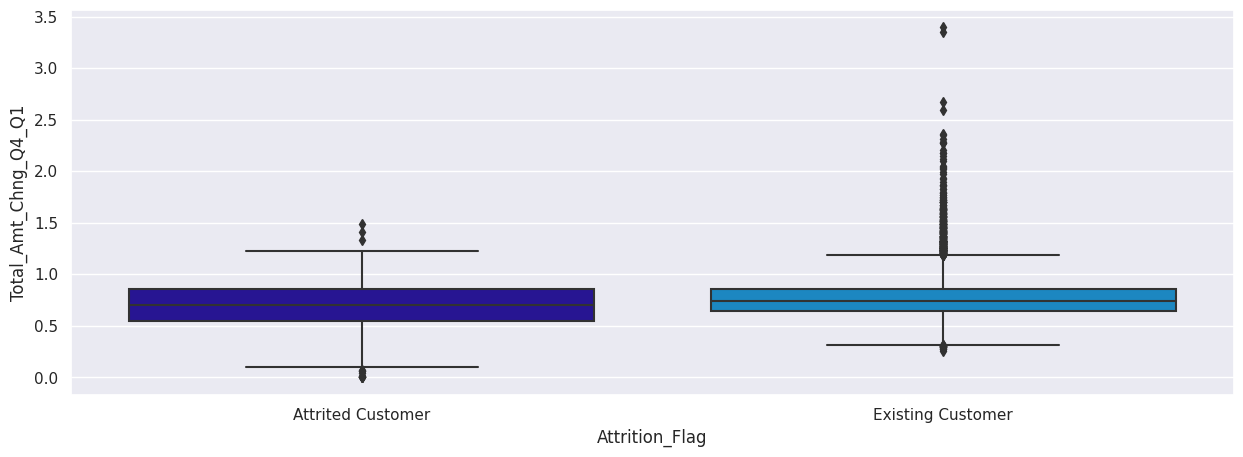

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Amt_Chng_Q4_Q1', x='Attrition_Flag',data=data)
plt.show()

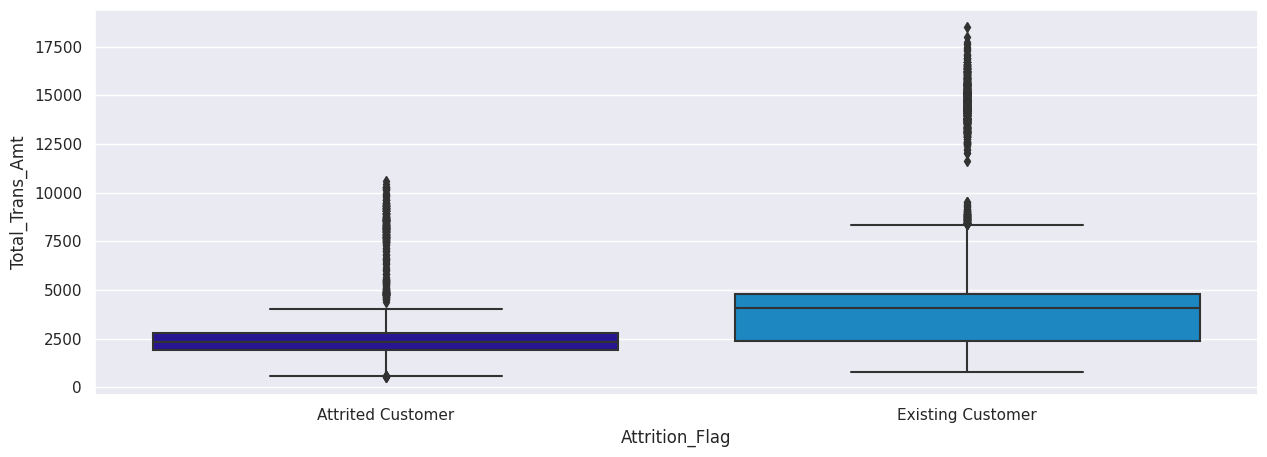

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Trans_Amt', x='Attrition_Flag',data=data)
plt.show()

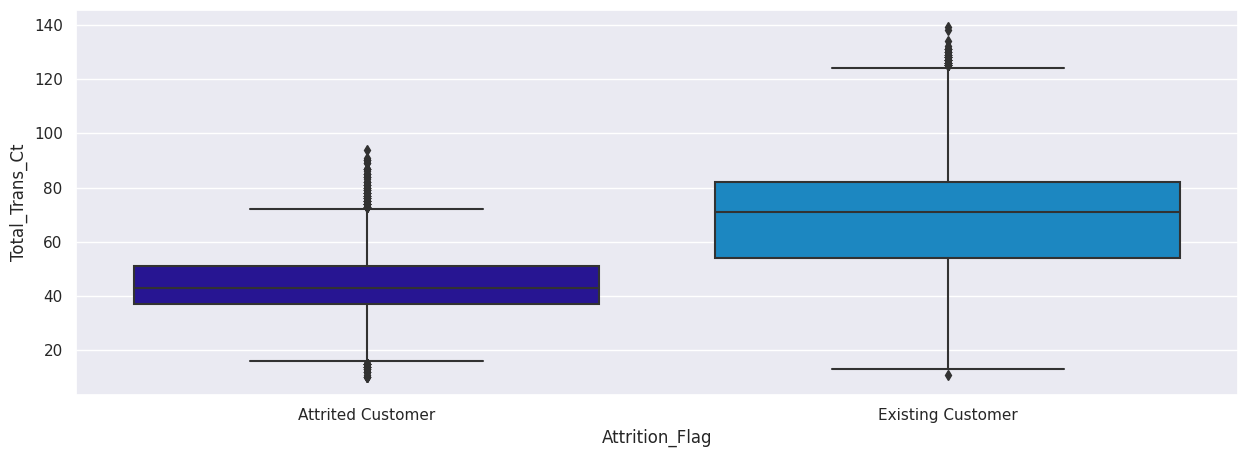

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Trans_Ct', x='Attrition_Flag',data=data)
plt.show()

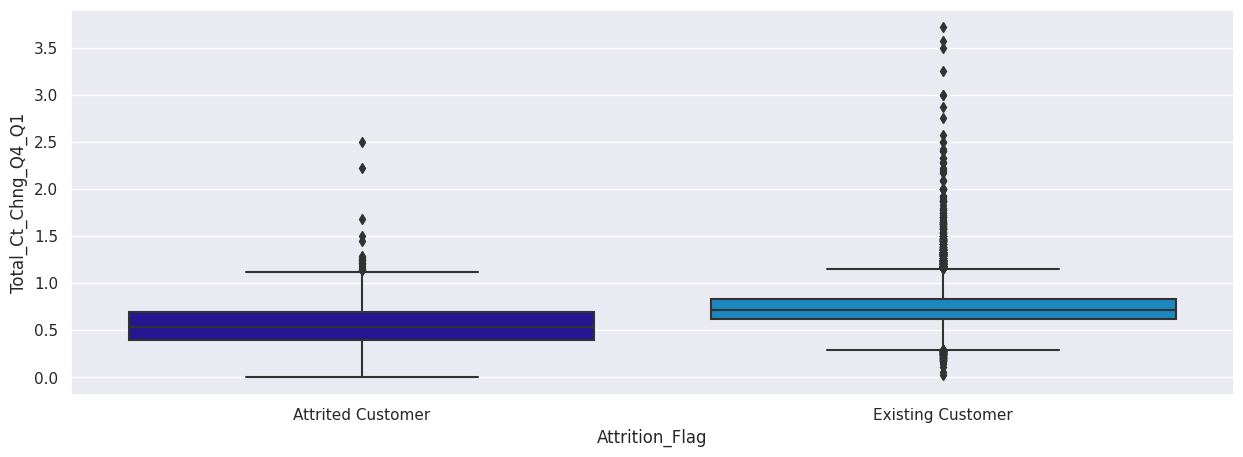

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Ct_Chng_Q4_Q1', x='Attrition_Flag',data=data)
plt.show()

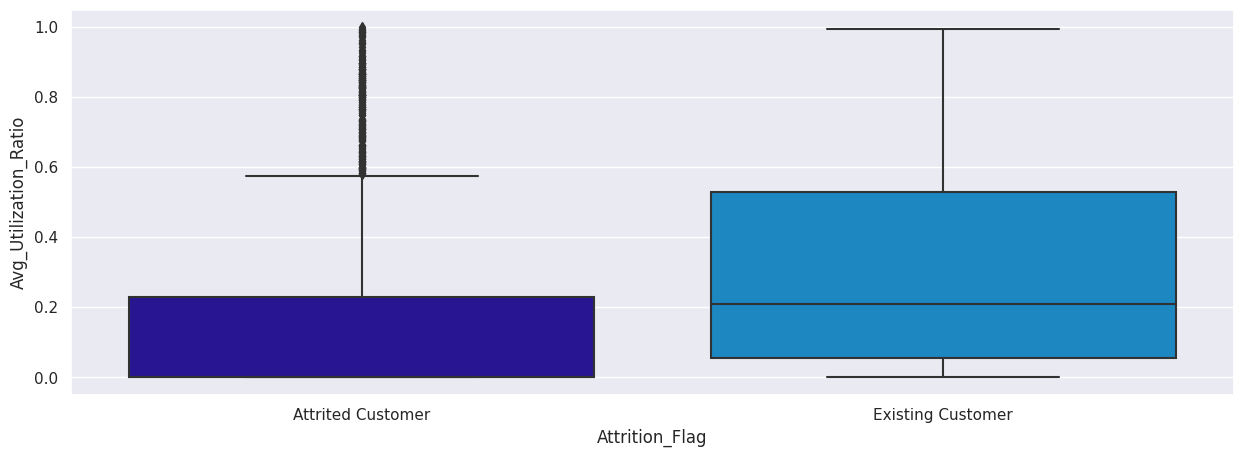

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Avg_Utilization_Ratio', x='Attrition_Flag',data=data)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10119 non-null  float64 
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

#Data PreProcessing
In this section I will be prepping the data before modeling.  This wil include dealing with outliers, scaling the data, adding features and dealing with missing values.

In [ ]:
# Already dropped Client ID

In [ ]:
# Replacing a string with a numerical for our binary targets
data.Attrition_Flag.replace({"Attrited Customer":1, "Existing Customer":0}, inplace = True)

In [ ]:
data.sample(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
8485              0            45      M                3             NaN   
2646              0            27      F                1   Post-Graduate   
3333              0            43      M                3        Graduate   
5448              0            55      F                2      Uneducated   
9666              0            54      M                1             NaN   
9381              0            32      M                3     High School   
3234              1            48      M                0       Doctorate   
1344              1            45      F                3     High School   
5119              0            61      F                0        Graduate   
3441              1            48      M                3        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
8485         Single  Less than $40K          Blue              36   
2646         Single  Less than $40K          Blue              22   
3333         Single     $40K - $60K          Blue              39   
5448        Married     $40K - $60K          Blue              48   
9666         Single    $80K - $120K          Blue              49   
9381         Single     $40K - $60K          Blue              36   
3234        Married     $60K - $80K          Blue              41   
1344        Married     $40K - $60K          Blue              30   
5119        Married     $40K - $60K          Blue              50   
3441        Married     $60K - $80K          Blue              37   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
8485                         2                     1.0                      0   
2646                         4                     1.0                      3   
3333                         5                     3.0                      5   
5448                         4                     1.0                      1   
9666                         2                     3.0                      3   
9381                         2                     2.0                      1   
3234                         2                     3.0                      4   
1344                         5                     2.0                      2   
5119                         3                     3.0                      0   
3441                         5                     2.0                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
8485        2326.0                  642           1684.0   
2646        2965.0                 1635           1330.0   
3333        8513.0                 1042              NaN   
5448        3011.0                 2138            873.0   
9666       28570.0                 2027          26543.0   
9381        3845.0                 1871           1974.0   
3234        7277.0                  504           6773.0   
1344       12355.0                    0          12355.0   
5119        4906.0                 2185           2721.0   
3441        8808.0                  390           8418.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
8485                 0.814             5413              90   
2646                 0.700             2553              59   
3333                 0.702             2015              37   
5448                 0.565             4439              75   
9666                 0.749            15130             102   
9381                 0.847            14593             110   
3234                 0.582             2356              40   
1344                 0.912             1044              28   
5119                 0.660             3999              71   
3441                 0.628             1905              42   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
8485                0.765                  0.276  
2646                0.553                  0.551

# Feature Engineering
I am creating a new feature 'Aquired' to categorize the feature that captures that huge number of customers who are all in the 36 months on the book tenure.  I will call that class aquired and the other class regular  this will be used to signal if the two classes behave differently

In [ ]:
# Find the most common value in 'Months_on_book' column
most_common_value = data['Months_on_book'].value_counts().idxmax()

# Print the most common value
print("The most common value in 'Months_on_book' column is:", most_common_value)

The most common value in 'Months_on_book' column is: 36


In [ ]:
# Create the new 'acquired' feature based on a condition
data['acquired'] = pd.np.where(data['Months_on_book'] == most_common_value, 'acquired', 'regular')
data.sample(8)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
385               0            57      M                2        Graduate   
5216              1            48      M                4             NaN   
6690              0            52      F                4        Graduate   
1752              1            26      F                0      Uneducated   
531               0            46      M                2         College   
5541              1            45      F                3         College   
8545              1            52      F                3      Uneducated   
2354              0            39      F                2             NaN   

     Marital_Status Income_Category Card_Category  Months_on_book  \
385         Married    $80K - $120K          Blue              40   
5216         Single     $40K - $60K          Blue              43   
6690        Married             NaN          Blue              42   
1752         Single  Less than $40K          Blue              20   
531          Single    $80K - $120K          Blue              41   
5541         Single             NaN          Blue              33   
8545         Single     $40K - $60K          Blue              36   
2354        Married  Less than $40K          Blue              19   

      Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
385                          3  ...                      3       12208.0   
5216                         2  ...                      2       11272.0   
6690                         5  ...                      2        1816.0   
1752                         3  ...                      4        1438.3   
531                          4  ...                      0       21526.0   
5541                         5  ...                      4        4345.0   
8545                         2  ...                      3        1915.0   
2354                         5  ...                      1        3156.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
385                  1980          10228.0                 0.616   
5216                 1744           9528.0                 0.347   
6690                    0           1816.0                 0.664   
1752                    0           1438.3                 0.506   
531                  2332          19194.0                 0.755   
5541                 2198           2147.0                 0.465   
8545                 1445            470.0                 0.374   
2354                 2095           1061.0                 1.281   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
385              1409              34                0.619   
5216             1455              34                0.214   
6690             4957              78                0.773   
1752              947              20                0.053   
531              1313              37                0.609   
5541             1918              31                0.292   
8545             2264              39                0.560   
2354             2739              56                0.750   

      Avg_Utilization_Ratio  acquired  
385                   0.162   regular  
5216                  0.155   regular  
6690                  0.000   regular  
1752                  0.000   regular  
531                   0.108   regular  
5541                  0.506   regular  
8545                  0.755  acquired  
2354                  0.664   regular  

[8 rows x 21 columns]

In [ ]:
# Check unique values in the 'acquired' feature
acquired_counts = data['acquired'].value_counts()

# Print the unique values with counts
print(acquired_counts)

regular     7664
acquired    2463
Name: acquired, dtype: int64


In [ ]:
#  Dropping Avg_Open_To_Buy (correlates to Credit Limit) and  Avg_Utilization_Ratio (correlates to Total_Revolving Balance)
data.drop(columns=["Avg_Open_To_Buy","Avg_Utilization_Ratio"], inplace=True)

# Removing Outliers  See Normalizing Numericals Section
I have reviewed all the boxplots and I do not observer outliers to be so extreme or where they exist too few to not represent
improtant information for the model, so I am intentionally not removing any outliers.  However I am normalizing the numerical fields using a logrythmic function which will address couple of features that are right skewed but have a significant amount of outliers on the right side of the distribution. This will take place after the split of training and test sets.

## Missing-Value Treatment
Below, I see one numerical feature with only 8 nulls and three categorical values with quite a number of nulls.
Months_Inactive_12_mon         8
Education_Level              478
Marital_Status               749
Income_Category             1112

I will remove the 8 rows in the first feature but for the categoricals, I am going to make the null values into a category "Unknown"  This will keep the integrity of the other categories rather than using a mechanism to impute those values.

In [ ]:
#Checking that no column has missing values in train or test sets
print(data.isna().sum())
print('-'*30)

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         8
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
acquired                       0
dtype: int64
------------------------------


In [ ]:
# Removing the 8 rows that have Months_Inactive_12_mon  nume = null
data.dropna(subset=['Months_Inactive_12_mon'], inplace=True)


In [ ]:
#converting the null values in three features to Unknown
# Idnetifying columns to replace
# Assuming 'data' is the name of your dataframe
columns_to_replace = ['Education_Level', 'Marital_Status', 'Income_Category']
values_to_replace = [None, '', 'Other']  # Specify any other values to replace with 'Unknown'

# Convert the columns to the 'object' data type (string) temporarily
data[columns_to_replace] = data[columns_to_replace].astype('object')

# Replace null values, empty strings, and specified values with 'Unknown'
data[columns_to_replace] = data[columns_to_replace].replace(values_to_replace, 'Unknown')

# Convert the columns back to the categorical data type
data[columns_to_replace] = data[columns_to_replace].astype('category')

In [ ]:
#CHecking to make sure all featurs are clear of nulls
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
acquired                    0
dtype: int64

In [ ]:

data1=data.copy()  #creating a new copy of the dataframe prior to mapping

In [ ]:
data1.sample(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
6299              0            43      F                3         College   
9837              1            53      M                2         Unknown   
1675              0            56      M                1         College   
8683              0            45      M                2        Graduate   
7045              0            59      M                1         Unknown   
6154              0            45      F                2        Graduate   
8197              0            59      F                0         College   
2288              0            30      M                0        Graduate   
2945              0            39      M                1      Uneducated   
4454              0            45      M                3     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
6299         Single  Less than $40K          Blue              28   
9837         Single     $60K - $80K          Blue              43   
1675        Married    $80K - $120K          Blue              45   
8683        Married     $40K - $60K          Blue              36   
7045        Married     $60K - $80K          Blue              48   
6154        Married  Less than $40K          Blue              38   
8197         Single  Less than $40K          Blue              40   
2288       Divorced    $80K - $120K          Blue              23   
2945        Married  Less than $40K          Blue              28   
4454        Married     $40K - $60K        Silver              33   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6299                         3                     1.0                      3   
9837                         2                     2.0                      3   
1675                         5                     1.0                      3   
8683                         2                     1.0                      3   
7045                         5                     3.0                      3   
6154                         3                     3.0                      3   
8197                         1                     3.0                      3   
2288                         6                     1.0                      2   
2945                         3                     3.0                      4   
4454                         3                     2.0                      1   

      Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
6299        1438.3                    0                 0.830   
9837        5905.0                    0                 0.797   
1675        4145.0                 1468                 0.579   
8683        3735.0                 2113                 0.684   
7045        1438.3                  642                 0.926   
6154        1513.0                  788                 0.677   
8197        3297.0                    0                 0.861   
2288       26783.0                 1285                 0.590   
2945        4683.0                 2514                 0.580   
4454       16928.0                 1519                 0.894   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  acquired  
6299             4482              54                0.636   regular  
9837             8883              83                0.729   regular  
1675             1238              36                0.500   regular  
8683             7059              82                0.577  acquired  
7045             5177              79                0.646   regular  
6154             4166              71                0.868   regular  
8197             4783              91                0.685   regular  
2288             2495              46                0.769   regular  
2945             2010              45                0.731   regular  
4454             3355              66                0.886   regular

## Split Data

In [ ]:
X = data1.drop(['Attrition_Flag'],axis=1)
y = data1['Attrition_Flag']

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(7083, 18) (3036, 18)


# Normalizing Numericals and also outlier treatment
This addresses both potential scale issues and takes care of the features that have outliers in significant number on the right side of the right skewed distribution that was concerning

*  Total_Ct_Chng_Q4_Q1
*  Total_Trans_Amt
*  Total_Amt_Chng_Q4_Q1
*  Credit_Limit



In [ ]:
# Function to normalize with log scale
def normalize_columns(data):
    # Select numerical columns
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

    # Normalize numerical columns
    for column in numerical_columns:
        min_value = data[column].min()
        max_value = data[column].max()
        data[column] = (data[column] - min_value) / (max_value - min_value)

    return data

# Normalize the data
X_train = normalize_columns(X_train)
X_test = normalize_columns(X_test)
X_train.sample(10)

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
160       0.638298      M              0.0     High School        Married   
2289      0.191489      M              0.2   Post-Graduate        Married   
7860      0.404255      F              0.6        Graduate         Single   
6674      0.212766      F              0.6      Uneducated        Unknown   
4957      0.595745      F              0.4       Doctorate        Married   
128       0.553191      M              0.4     High School         Single   
7845      0.510638      F              0.4     High School        Married   
4356      0.468085      M              0.8     High School        Married   
7867      0.617021      F              0.6         College       Divorced   
7133      0.446809      M              0.4       Doctorate       Divorced   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
160     $80K - $120K          Blue        0.697674                       0.8   
2289    $80K - $120K          Blue        0.325581                       0.4   
7860         Unknown          Blue        0.534884                       0.0   
6674         Unknown          Blue        0.348837                       0.8   
4957  Less than $40K          Blue        0.651163                       0.2   
128      $40K - $60K          Blue        0.744186                       0.4   
7845  Less than $40K        Silver        0.558140                       0.0   
4356    $80K - $120K          Blue        0.534884                       0.8   
7867  Less than $40K          Blue        0.767442                       0.2   
7133    $80K - $120K          Blue        0.441860                       0.0   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
160                 0.333333               0.166667      0.042739   
2289                0.500000               0.666667      0.727913   
7860                0.333333               0.333333      0.087966   
6674                0.500000               0.333333      0.119558   
4957                0.333333               0.500000      0.073847   
128                 0.166667               0.333333      0.365615   
7845                0.500000               0.333333      0.361141   
4356                0.166667               0.333333      0.162034   
7867                0.500000               0.500000      0.055738   
7133                0.500000               0.500000      0.000000   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
160              0.406834              0.297027         0.065256   
2289             0.541518              0.345010         0.103346   
7860             0.727056              0.304975         0.216357   
6674             0.996822              0.199882         0.243580   
4957             1.000000              0.239918         0.111696   
128              0.516488              0.249043         0.057821   
7845             0.000000              0.204887         0.243809   
4356             1.000000              0.256991         0.218301   
7867             0.898689              0.192228         0.238147   
7133             0.000000              0.133647         0.107406   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  acquired  
160         0.140625             0.280034   regular  
2289        0.218750             0.203584   regular  
7860        0.437500             0.193783  acquired  
6674        0.718750             0.204144   regular  
4957        0.218750             0.113974   regular  
128         0.148438             0.396808   regular  
7845        0.523438             0.188743   regular  
4356        0.539062             0.246710  acquired  
7867        0.578125             0.163820   regular  
7133        0.250000             0.140017   regular

### Encoding categorical variables

In [ ]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3749
M    3334
Name: Gender, dtype: int64
******************************
Graduate         2220
High School      1384
Unknown          1055
Uneducated       1030
College           710
Post-Graduate     370
Doctorate         314
Name: Education_Level, dtype: int64
******************************
Married     3285
Single      2768
Divorced     522
Unknown      508
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2496
$40K - $60K       1241
$80K - $120K      1062
$60K - $80K        985
Unknown            767
$120K +            532
Name: Income_Category, dtype: int64
******************************
Blue        6599
Silver       384
Gold          87
Platinum      13
Name: Card_Category, dtype: int64
******************************
regular     5352
acquired    1731
Name: acquired, dtype: int64
******************************


In [ ]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7083, 31) (3036, 31)


### Target Class Imbalance - Oversampling train data using SMOTE
The target class is very imbalanced as mentioned earlier.  I will address this by oversampling or adding rows in the minority class using SMOTE

In [ ]:
print("Before UpSampling, counts of label 'Attrit': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'Do Not Attrit': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train, y_train= sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Attrit': {}".format(sum(y_train==1)))
print("After UpSampling, counts of label 'Do Not Attrit': {} \n".format(sum(y_train==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))


Before UpSampling, counts of label 'Attrit': 1138
Before UpSampling, counts of label 'Do Not Attrit': 5945 

After UpSampling, counts of label 'Attrit': 5945
After UpSampling, counts of label 'Do Not Attrit': 5945 

After UpSampling, the shape of train_X: (11890, 31)
After UpSampling, the shape of train_y: (11890,) 



#Building the model

First,  I am going to ceate  metric scoring and confusion matrix functions.

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(train)
    pred_test = model.predict(test)

    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)

    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)

    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))

    return score_list # returning the list with train and test scores

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##Model 1 Logistic Regression
I am creating my first model and fitting it.  You can see below that I used K Fold Cross-Validation with a nice plot that shows the distribution of accuracy results on the multiple folds.  The accuracy and precision results above the confusion matrix were good but the precision at .55 was marginal.  I added regularization to see if I could improve it with no better results.  

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

### using KFold and cross_val_score to check performance

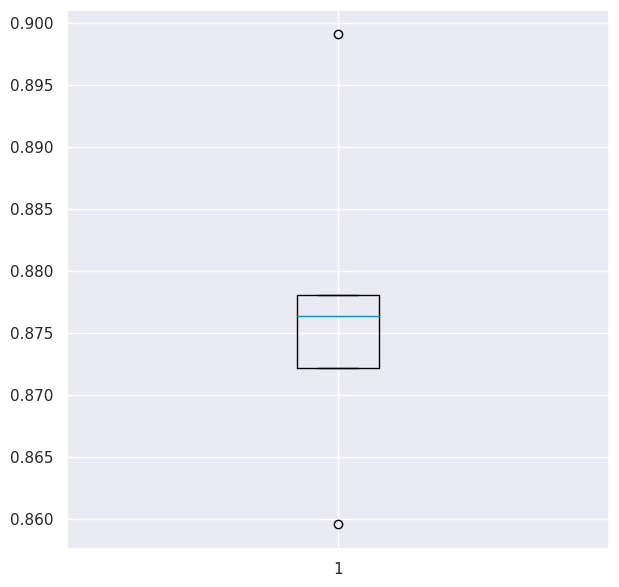

In [ ]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Accuracy on training set :  0.8711522287636669
Accuracy on test set :  0.863965744400527
Recall on training set :  0.8792262405382675
Recall on test set :  0.8135245901639344
Precision on training set :  0.8652540970038073
Precision on test set :  0.5521557719054242


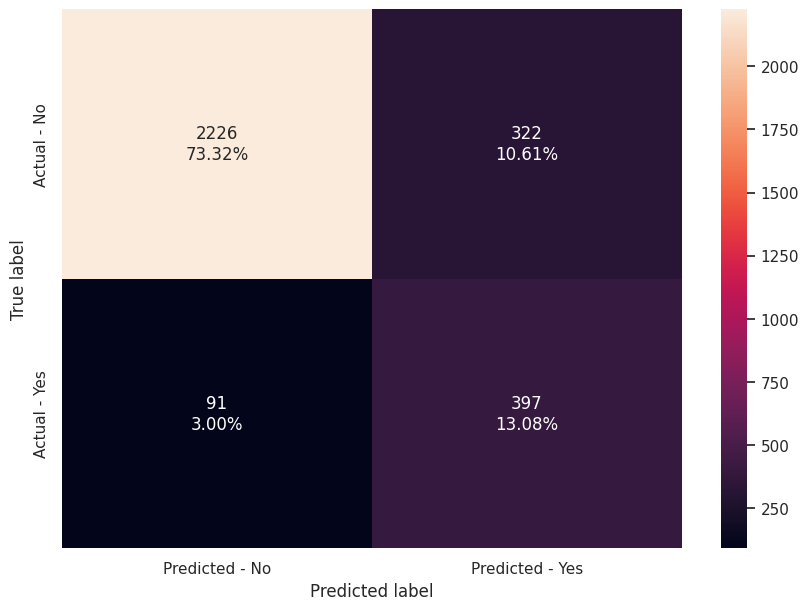

In [ ]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

### Applying Regularization

In [ ]:
# Choose the type of classifier.
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='saga')

Accuracy on training set :  0.8711522287636669
Accuracy on test set :  0.863965744400527
Recall on training set :  0.8792262405382675
Recall on test set :  0.8135245901639344
Precision on training set :  0.8652540970038073
Precision on test set :  0.5521557719054242


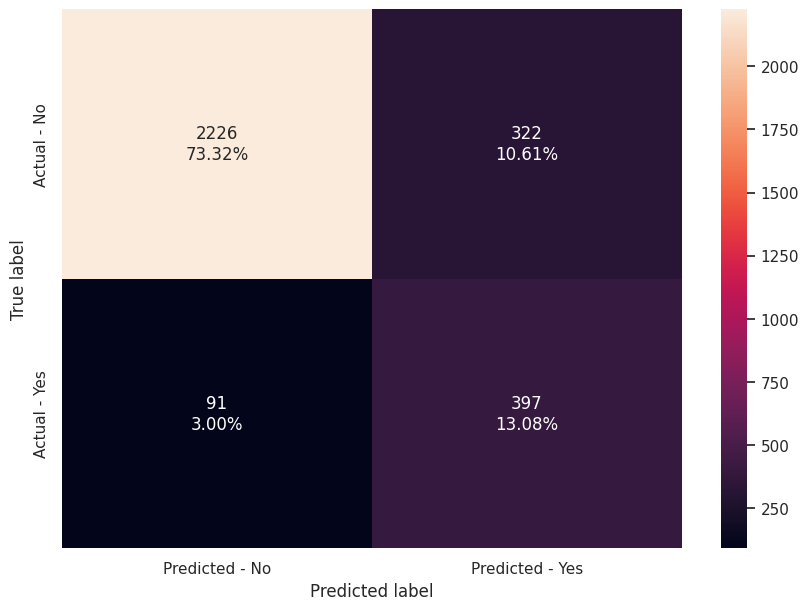

In [ ]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

In [ ]:
##  Adjusting my metrics scoring to maintain more easily for the next activities
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

##Model 2 Decision Tree Classifier
With this model the precision moved up to .59  at the expense of a marginally lower recall than the logisitic regression.

Accuracy on training set :  1.0
Accuracy on test set :  0.8784584980237155
Recall on training set :  1.0
Recall on test set :  0.7377049180327869
Precision on training set :  1.0
Precision on test set :  0.5990016638935108


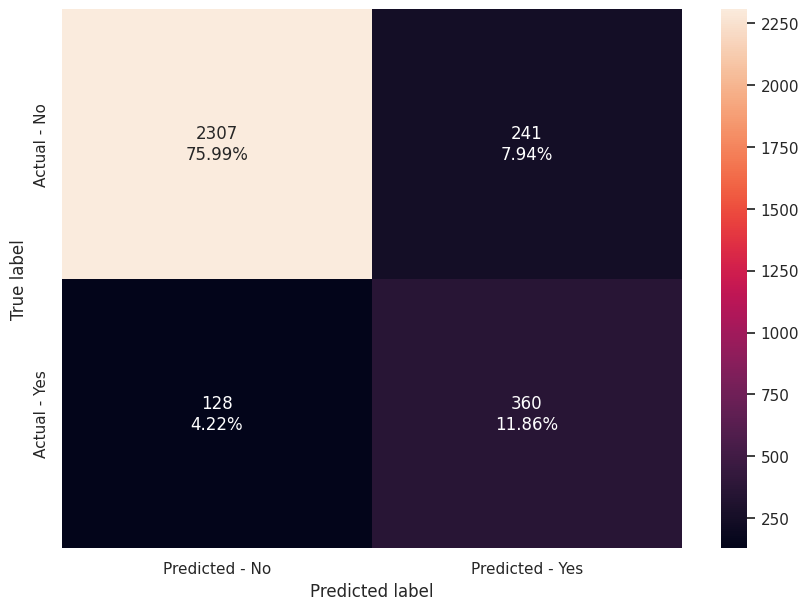

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

##Model 3 Decision Tree Classifier
Now we are getting to the tree based model.  With a very different approach.  THe results improved greatly.  Test Accuracy at 95%, recall still just under 80% but precision up to 91%  Much better than the previous but at the cost of explainability.

Accuracy on training set :  1.0
Accuracy on test set :  0.9545454545454546
Recall on training set :  1.0
Recall on test set :  0.7889344262295082
Precision on training set :  1.0
Precision on test set :  0.9166666666666666


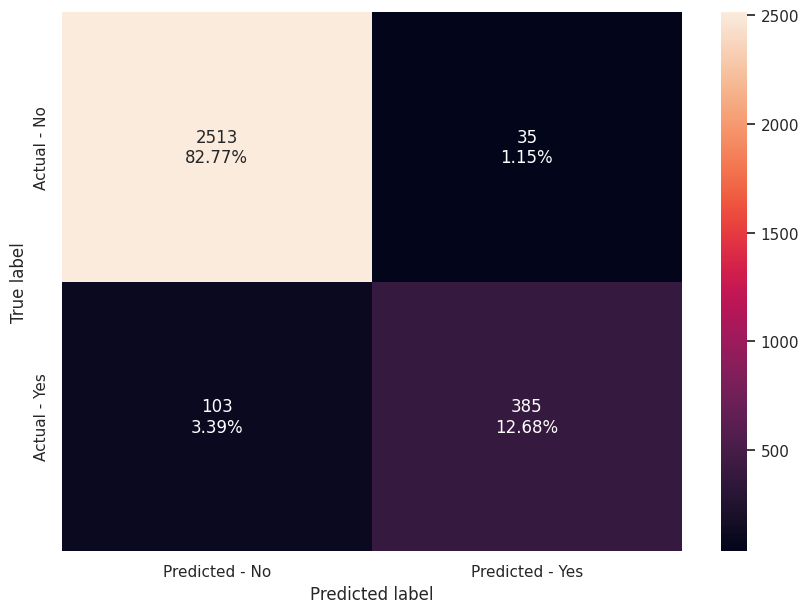

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

##Model 4 Bagging Classifier
The Bagging Classifier produced worse results Accuracy was at 91% but precision and recall  were both in the 70s

Accuracy on training set :  0.9987384356602187
Accuracy on test set :  0.9189723320158103
Recall on training set :  0.9988225399495374
Recall on test set :  0.7766393442622951
Precision on training set :  0.9986545576858392
Precision on test set :  0.7344961240310077


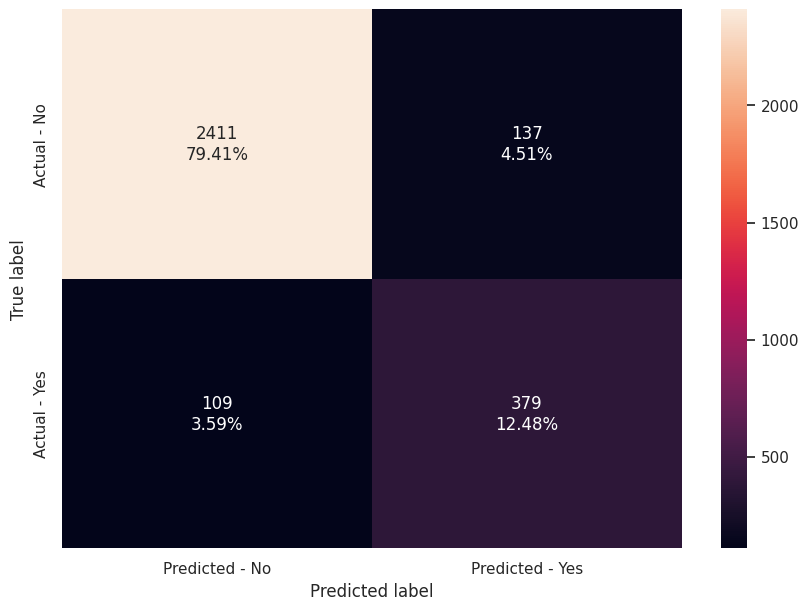

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

##Model 5 AdaBoost Classifier
Adaboost gave a good accuracy at 94% and precision at 88% but recall remained in the low 70s

Accuracy on training set :  0.9619848612279226
Accuracy on test set :  0.9407114624505929
Recall on training set :  0.9678721614802355
Recall on test set :  0.7274590163934426
Precision on training set :  0.9566084788029925
Precision on test set :  0.8830845771144279


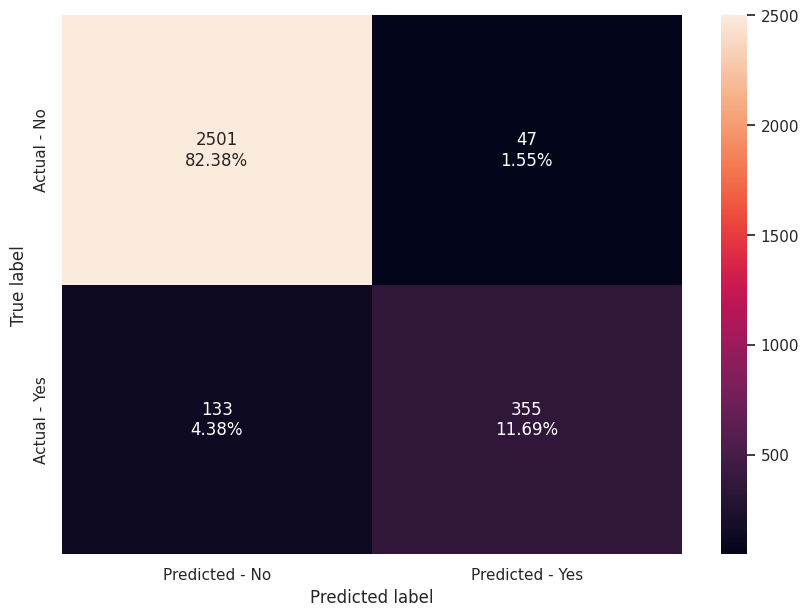

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

##Model 6 Gradient Boosting Classifier
With this model the precision moved up to 90%  Accuracy at 97% abd reacl at 88%  the best performance so far.  Not unexpected as these slow learning modfels tend to do well but it took more compute.

Accuracy on training set :  0.976619007569386
Accuracy on test set :  0.958498023715415
Recall on training set :  0.9774600504625736
Recall on test set :  0.8258196721311475
Precision on training set :  0.9758186397984887
Precision on test set :  0.9076576576576577


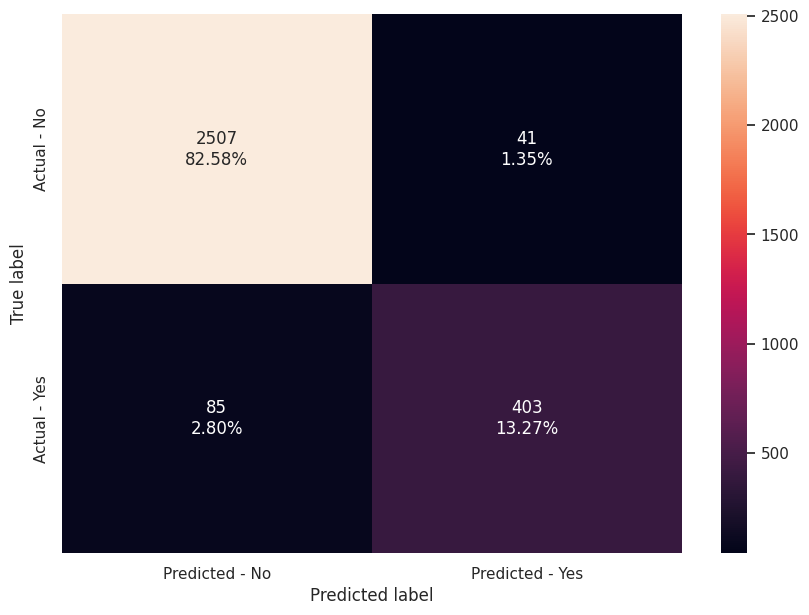

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

##Model 6 XGBoost Classifier
This model performed similarly to Gradient Boosting but with even more compute.  Here is where i could feel the longer comute time.

Accuracy on training set :  1.0
Accuracy on test set :  0.9594861660079052
Recall on training set :  1.0
Recall on test set :  0.819672131147541
Precision on training set :  1.0
Precision on test set :  0.9195402298850575


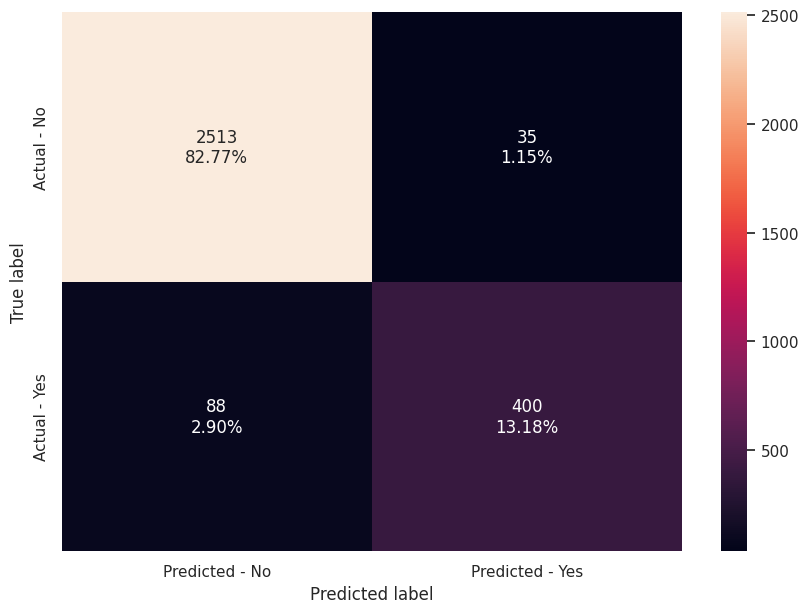

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

# eval_metric='mlogloss'

## Hyperparameter Tuning Using GridSeach on the top 3 models
NOw that i have tried 7 models, I am selecting my top 3 and using Gridsearch to tune the hyperparameters.  
-  XGBoost  Chosen as it had the best recall score > .7 and high precision BUT EXCLUDED DUE TO COMPUTE TIME ISSUES.  Not worth it for a 1 percent gain in precision other metrics being the same as Gradient Boosting
-  Random Forest  Chosen due to higher recall and precision scores than remaining models
-  Gradient Boost  Chosen due to higher recall and precision scores than remaining models
-  Adaboost chosen in lieu of XGBoost which has compute issues per rubric
_ Decision Tree NOT chosen because its precision score was poor event though recall was higher than most models.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Creating pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ('classification', RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, random_state=1, oob_score=True, bootstrap=True))
])

param_grid = {
    'classification__max_depth': list(np.arange(5, 30, 5)),
    'classification__max_features': ['sqrt', 'log2', None],
    'classification__min_samples_leaf': np.arange(1, 15, 5),
    'classification__min_samples_split': np.arange(2, 20, 5),
    'classification__n_estimators': np.arange(10, 110, 10)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))



Best Parameters:{'classification__max_depth': 5, 'classification__max_features': 'sqrt', 'classification__min_samples_leaf': 6, 'classification__min_samples_split': 2, 'classification__n_estimators': 100} 
Score: 0.9927670311185871


Accuracy on training set :  0.9238856181665265
Accuracy on test set :  0.910737812911726
Recall on training set :  0.943986543313709
Recall on test set :  0.8422131147540983
Precision on training set :  0.907503234152652
Precision on test set :  0.6793388429752066


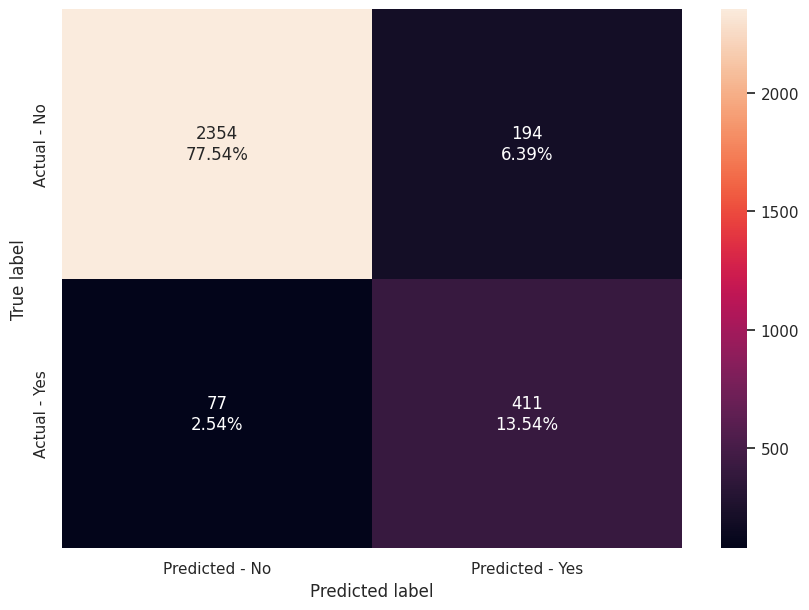

In [ ]:
#Fitting the model
est_params = {
    'max_depth': 5,
    'max_features': 'sqrt',
    'min_samples_leaf': 6,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Create the RandomForestClassifier with best parameters
rf_estimator = RandomForestClassifier(random_state=1, **est_params)

rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

In [ ]:
# Creating pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ('classification', AdaBoostClassifier(random_state=1))
])

param_grid = {
    'classification__n_estimators': [50, 100, 150],
    'classification__learning_rate': [0.1, 0.5, 1.0],
    'classification__algorithm': ['SAMME', 'SAMME.R']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'classification__algorithm': 'SAMME.R', 'classification__learning_rate': 0.5, 'classification__n_estimators': 50} 
Score: 0.943650126156434


Accuracy on training set :  0.9470142977291842
Accuracy on test set :  0.9384057971014492
Recall on training set :  0.9634987384356603
Recall on test set :  0.8360655737704918
Precision on training set :  0.9327471095912718
Precision on test set :  0.7922330097087379


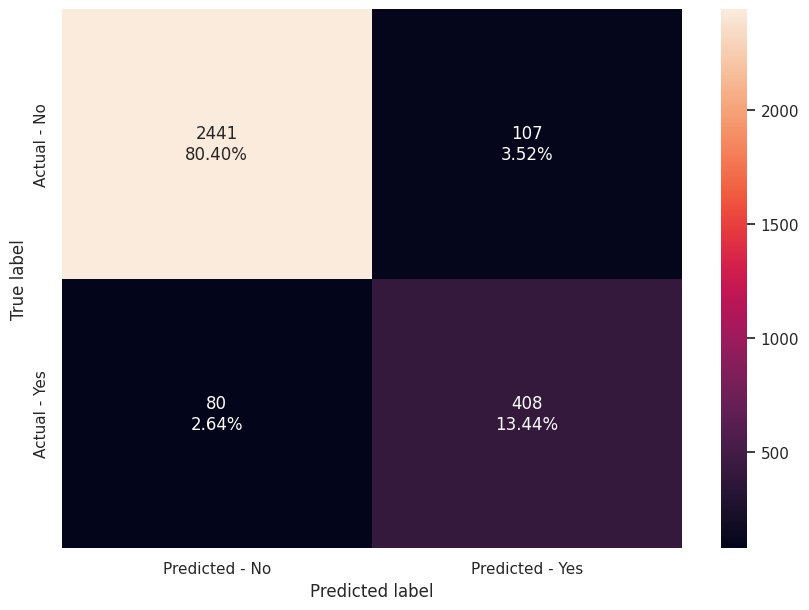

In [ ]:
# Create the AdaBoostClassifier with best parameters
ada_estimator = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.5, n_estimators=50, random_state=1)

# Fit the model with best parameters
ada_estimator.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(ada_estimator)

# Creating confusion matrix
make_confusion_matrix(ada_estimator, y_test)

In [ ]:
# Creating pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ('classification', GradientBoostingClassifier(random_state=1))
])

param_grid = {
    'classification__n_estimators': [50, 100, 150],
    'classification__learning_rate': [0.1, 0.5, 1.0],
    'classification__max_depth': [3, 5, 7]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'classification__learning_rate': 0.1, 'classification__max_depth': 7, 'classification__n_estimators': 50} 
Score: 0.959798149705635


Accuracy on training set :  0.9951219512195122
Accuracy on test set :  0.9581686429512516
Recall on training set :  0.9961312026913373
Recall on test set :  0.8545081967213115
Precision on training set :  0.9941245593419507
Precision on test set :  0.8816067653276956


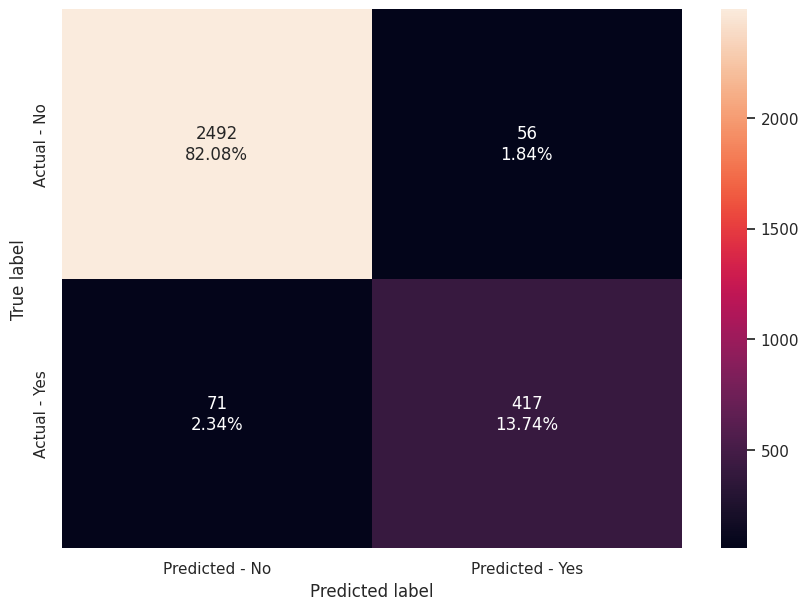

In [ ]:
# Create the GradientBoostingClassifier with best parameters
gb_estimator = GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=50, random_state=1)

# Fit the model with best parameters
gb_estimator.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(gb_estimator)

# Creating confusion matrix
make_confusion_matrix(gb_estimator, y_test)

#Final Model Results
Below I created a graph that takes the scoring of all the tuned models and compares them.  The Winner is GRADIENT BOOSTING!!!
Final Score
*   Accuracy on test set :  0.9581686429512
*   Recall on test set :  0.8545081967213115
*   Precision on test set :  0.8816067653276956

Accuracy on training set :  0.9227081581160639
Accuracy on test set :  0.9084321475625824
Recall on training set :  0.9431455004205215
Recall on test set :  0.8422131147540983
Precision on training set :  0.9061085972850679
Precision on test set :  0.6715686274509803
Accuracy on training set :  0.9470142977291842
Accuracy on test set :  0.9384057971014492
Recall on training set :  0.9634987384356603
Recall on test set :  0.8360655737704918
Precision on training set :  0.9327471095912718
Precision on test set :  0.7922330097087379
Accuracy on training set :  0.9951219512195122
Accuracy on test set :  0.9581686429512516
Recall on training set :  0.9961312026913373
Recall on test set :  0.8545081967213115
Precision on training set :  0.9941245593419507
Precision on test set :  0.8816067653276956


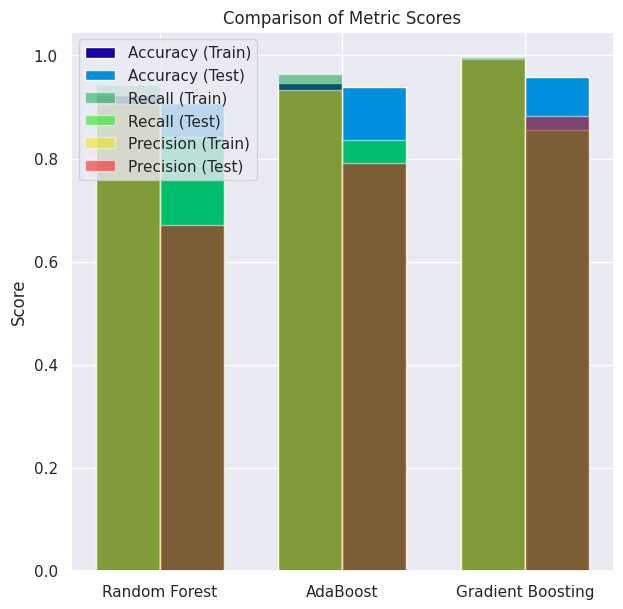

In [ ]:
# Create the three models with their best parameters
rf_estimator = RandomForestClassifier(random_state=1, max_depth=5, max_features='sqrt', min_samples_leaf=6, min_samples_split=17, n_estimators=100)
ada_estimator = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.5, n_estimators=50, random_state=1)
gb_estimator = GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=50, random_state=1)

# Fit the models with the training data
rf_estimator.fit(X_train, y_train)
ada_estimator.fit(X_train, y_train)
gb_estimator.fit(X_train, y_train)

# Calculate metric scores for each model
rf_scores = get_metrics_score(rf_estimator)
ada_scores = get_metrics_score(ada_estimator)
gb_scores = get_metrics_score(gb_estimator)

# Create lists to store the metric scores
accuracy_scores_train = [rf_scores[0], ada_scores[0], gb_scores[0]]
accuracy_scores_test = [rf_scores[1], ada_scores[1], gb_scores[1]]
recall_scores_train = [rf_scores[2], ada_scores[2], gb_scores[2]]
recall_scores_test = [rf_scores[3], ada_scores[3], gb_scores[3]]
precision_scores_train = [rf_scores[4], ada_scores[4], gb_scores[4]]
precision_scores_test = [rf_scores[5], ada_scores[5], gb_scores[5]]

# Set the bar width
bar_width = 0.35

# Set the x positions
x_train = np.arange(len(models))
x_test = x_train + bar_width

# Plot the scores
plt.bar(x_train, accuracy_scores_train, width=bar_width, label='Accuracy (Train)')
plt.bar(x_test, accuracy_scores_test, width=bar_width, label='Accuracy (Test)')
plt.bar(x_train, recall_scores_train, width=bar_width, label='Recall (Train)', alpha=0.5)
plt.bar(x_test, recall_scores_test, width=bar_width, label='Recall (Test)', alpha=0.5)
plt.bar(x_train, precision_scores_train, width=bar_width, label='Precision (Train)', alpha=0.5)
plt.bar(x_test, precision_scores_test, width=bar_width, label='Precision (Test)', alpha=0.5)

# Set the x-axis tick labels
plt.xticks(x_train + bar_width/2, models)

# Set the y-axis label
plt.ylabel('Score')

# Set the plot title
plt.title('Comparison of Metric Scores')

# Add a legend
plt.legend()

# Show the plot
plt.show()

##Feature Importance
The last item I will run is to get a representation of contribution of each feature to the model prediction.  In this, you will see that transaction volume and amount are the best prdictors along with the numer of products used and the balance on the card.  

In [ ]:
# Get feature importances
importance = gb_estimator.feature_importances_

# Get the column/feature names from X_train
feature_names = np.array(X_train.columns)

# Create a dictionary to store feature importance values
feature_importance_dict = {}

# Associate each feature with its importance value
for feature_name, importance_value in zip(feature_names, importance):
    feature_importance_dict[feature_name] = importance_value

# Sort the feature importance dictionary by importance value (descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance values
for feature_name, importance_value in sorted_feature_importance:
    print(f"{feature_name}: {importance_value}")

Total_Trans_Ct: 0.49119395286788264
Total_Trans_Amt: 0.13250843795993428
Total_Revolving_Bal: 0.08778256765282696
Total_Relationship_Count: 0.08648170094703946
Total_Ct_Chng_Q4_Q1: 0.06597694860358463
Months_Inactive_12_mon: 0.04590888217239351
Total_Amt_Chng_Q4_Q1: 0.02566083155994314
Customer_Age: 0.019817038493715793
Contacts_Count_12_mon: 0.01784779077703863
Credit_Limit: 0.009999300267983707
Dependent_count: 0.006383532028129544
Months_on_book: 0.0035492476256384796
Gender_M: 0.0012298262283964455
Marital_Status_Married: 0.0009614657492352073
Marital_Status_Unknown: 0.0005750804759628032
Income_Category_Unknown: 0.00047258297299558247
Income_Category_Less than $40K: 0.0004649348823946127
Education_Level_Uneducated: 0.0003836186060793778
Education_Level_High School: 0.0003600658624209382
Income_Category_$60K - $80K: 0.00031421862767005147
Card_Category_Gold: 0.0002920992114935702
acquired_regular: 0.00028758831412427675
Marital_Status_Single: 0.0002823089254296404
Card_Category_Sil

###Conclusions and Recommendations

*   The best model was gradient boosting which combined the best results with decent compute.  No surprise as Gradient Boosting typ models generally win comeptitions depending on the nature of the problem

*   We also showed that we could reliably predict customers who may churn

*   We did not see any demgraphic having disproprtionate churn in the analysis, but we did see that the largest client cohorts were college graduates and lower earners so I would recommend campaigns and products tailored to those groups.

*   I would also recommend selling more products to each client.  The more products used, the sticker the customer.

*   Lastly, I reccomend using the churn model to highlight customers who may churn and create communications programs and possibly promotions targeting them








